In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

In [2]:
# reading the file
df1 = pd.read_csv(r'../data/TelcomCustomer-Churn_1.csv')
df2 = pd.read_csv(r'../data/TelcomCustomer-Churn_2.csv')

In [3]:
# checking the intial few records
display(df1.head(),df2.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# checking the shape of the both datasets
print('shape before joining')
print(df1.shape,df2.shape)
print('joining dataset...')
# joining both the data
df = df1.join(df2, how='outer', on=None, validate="many_to_many")
print('shape after join')
print(df.shape)

shape before joining
(7043, 10) (7043, 11)
joining dataset...
shape after join
(7043, 21)


In [5]:
# checking summary statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# checking the value count for each object
for records in df.loc[:, df.dtypes == 'object'].columns.to_list():
    print(records)
    print(df[records].value_counts(dropna=True))
    print('---'*10)

customerID
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
------------------------------
gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
------------------------------
Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
------------------------------
Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
------------------------------
PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
------------------------------
MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
------------------------------
InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
------------------------------
OnlineSecurity

In [8]:
# converting total charges to numeric and dropping the inconsistencies
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [9]:
# checking null values 
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
df = df.fillna('TotalCharges')

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
char = df.loc[:,df.dtypes == 'object'].columns.tolist()
num = df.describe().columns.tolist()

In [14]:
replace_values = {
'gender': {'Female':0, 'Male':1} ,
'Partner' : {'Yes': 1, 'No': 0} ,
'Dependents' : {'Yes': 1, 'No': 0} ,
'PhoneService' : {'Yes': 1, 'No': 0} ,
'MultipleLines' : {'No phone service': 2, 'Yes': 1, 'No': 0} ,
'InternetService' : {'DSL': 2, 'Fiber optic': 1, 'No': 0} ,
'OnlineSecurity' : {'No internet service': 2, 'Yes': 1, 'No': 0} ,
'OnlineBackup' : {'No internet service': 2, 'Yes': 1, 'No': 0} ,
'DeviceProtection' : {'No internet service': 2, 'Yes': 1, 'No': 0},
'TechSupport' : {'No internet service': 2, 'Yes': 1, 'No': 0},
'StreamingTV' : {'No internet service': 2, 'Yes': 1, 'No': 0},
'StreamingMovies' : {'No internet service': 2, 'Yes': 1, 'No': 0},
'Contract' : {'Month-to-month':1, 'One year':2, 'Two year':3 },
'PaperlessBilling' : {'Yes': 1, 'No': 0} ,
'PaymentMethod' : {'Electronic check':1, 'Mailed check':0, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3},
'Churn' : {'Yes': 1, 'No': 0}
}

In [15]:
df = df.replace(replace_values)

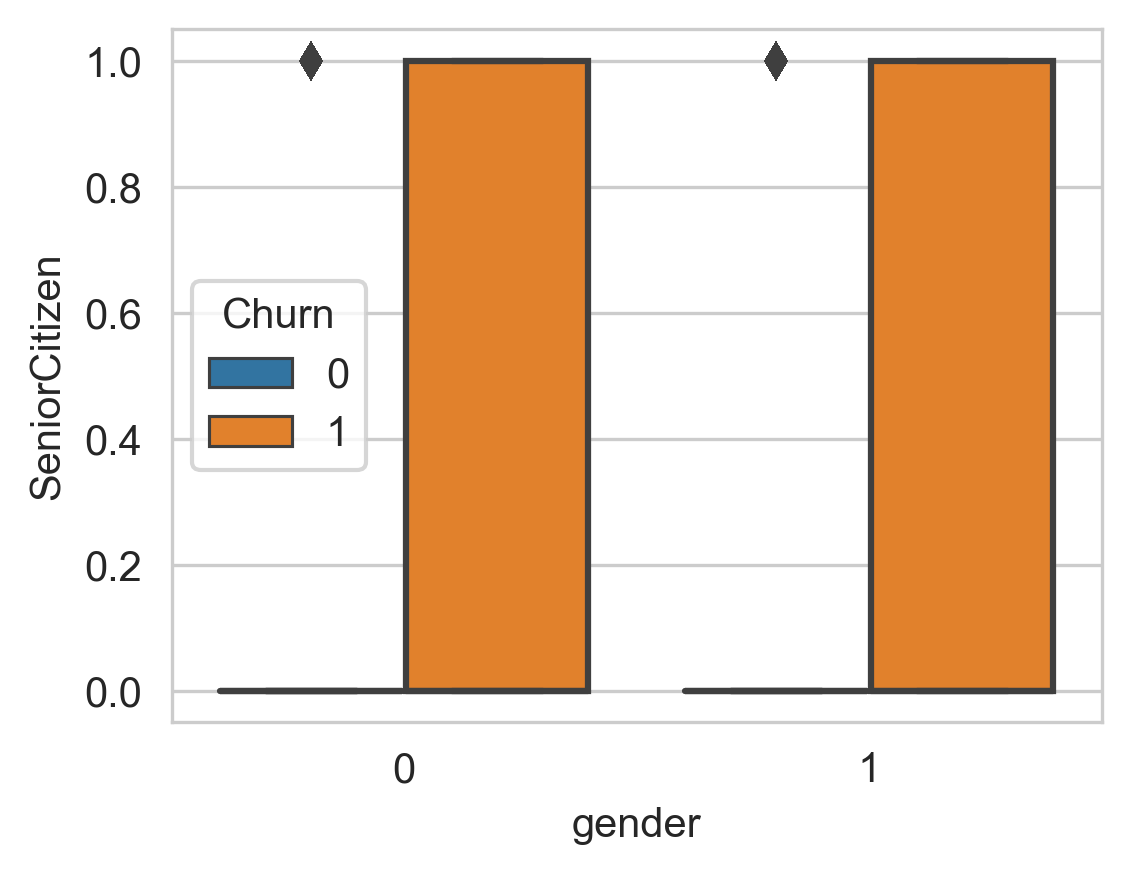

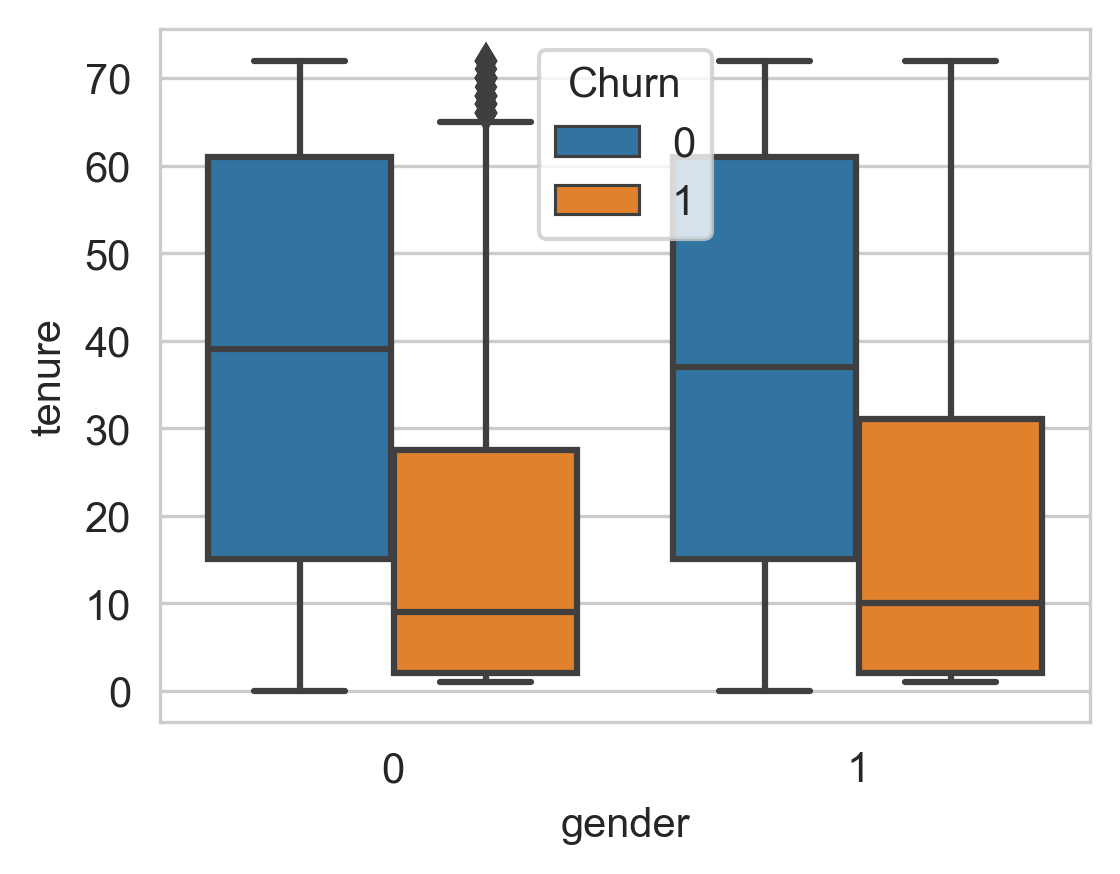

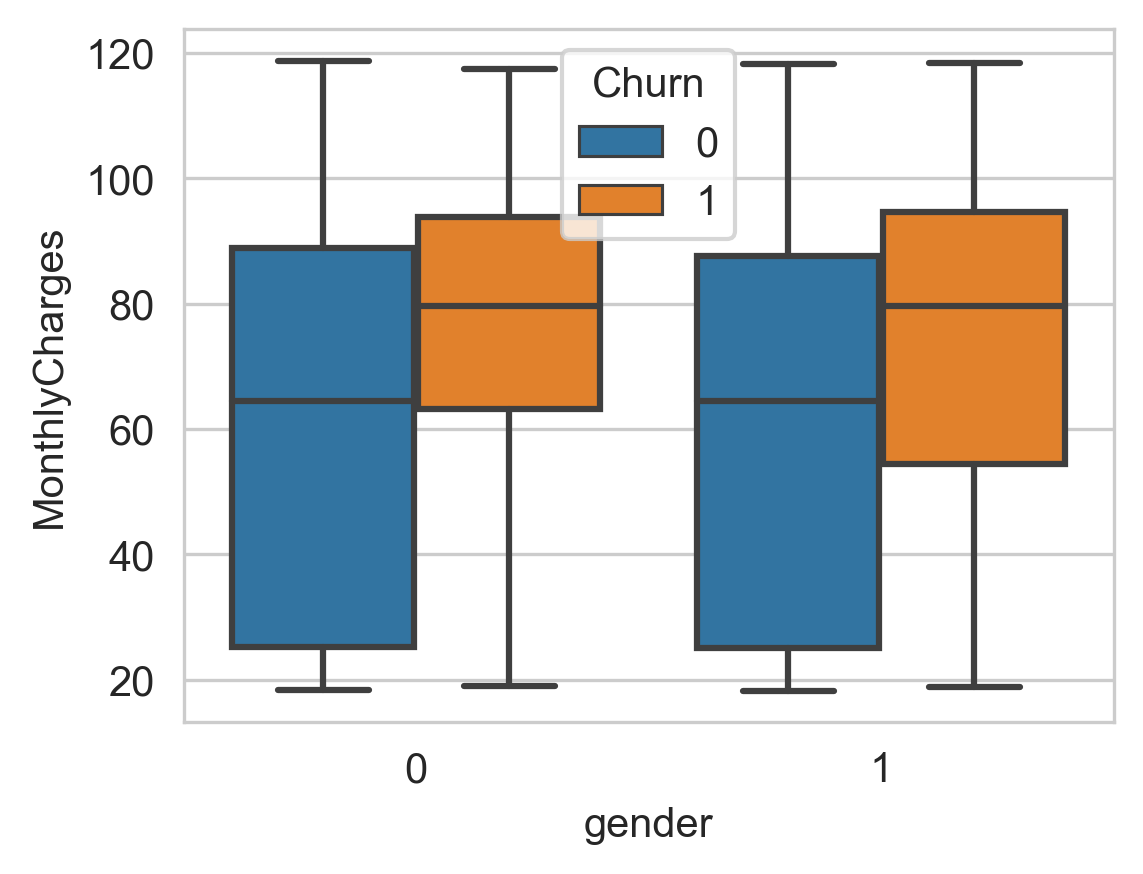

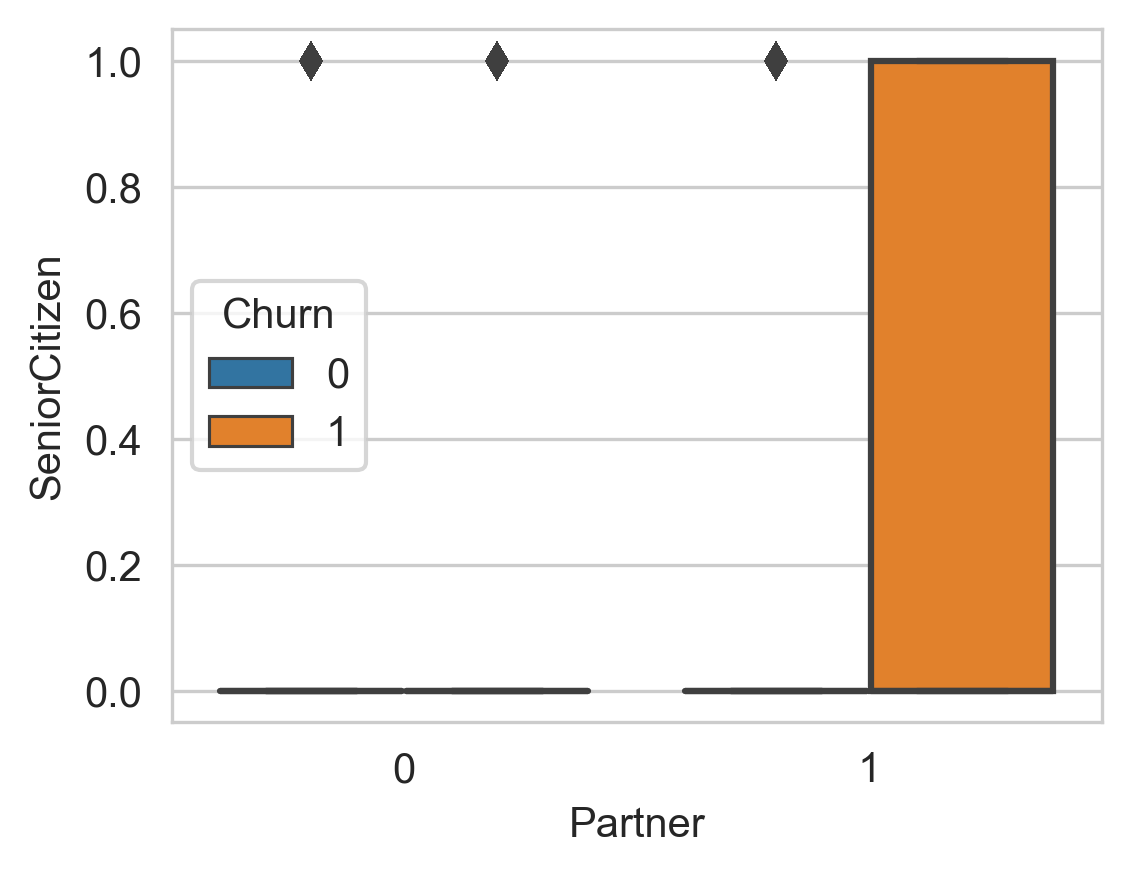

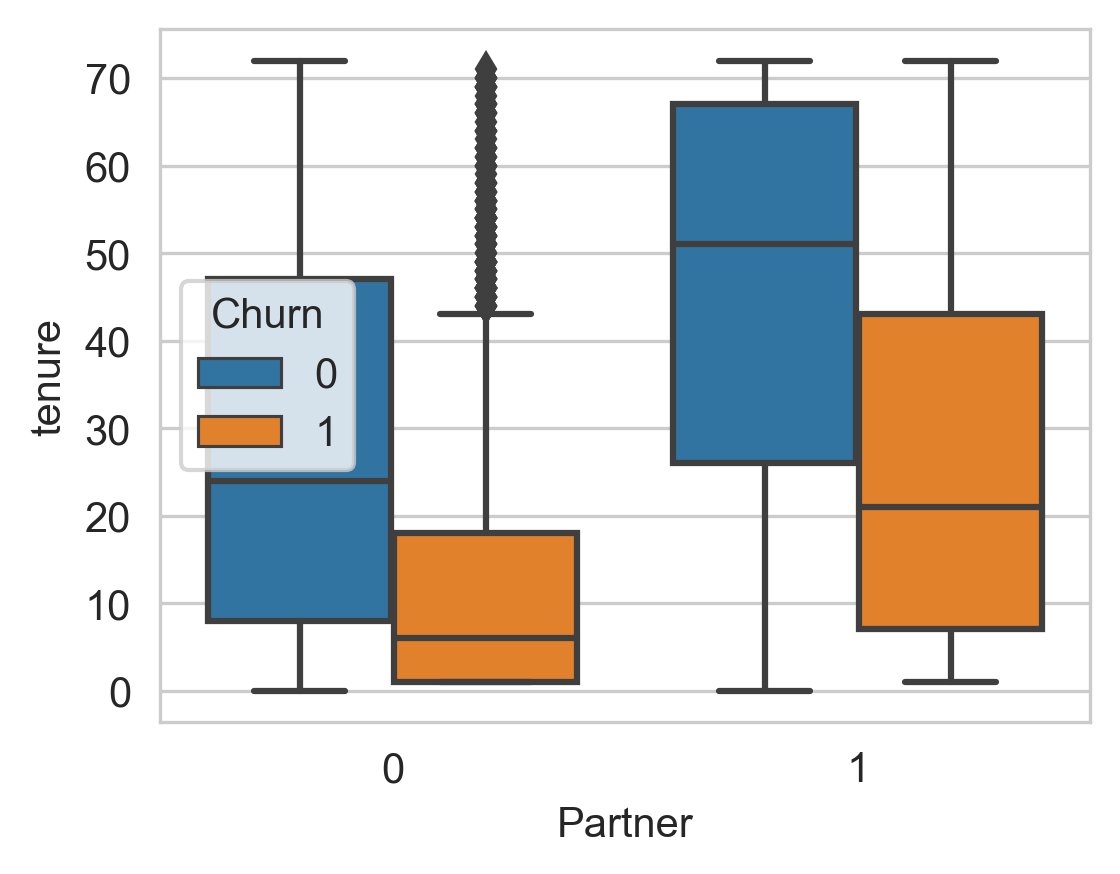

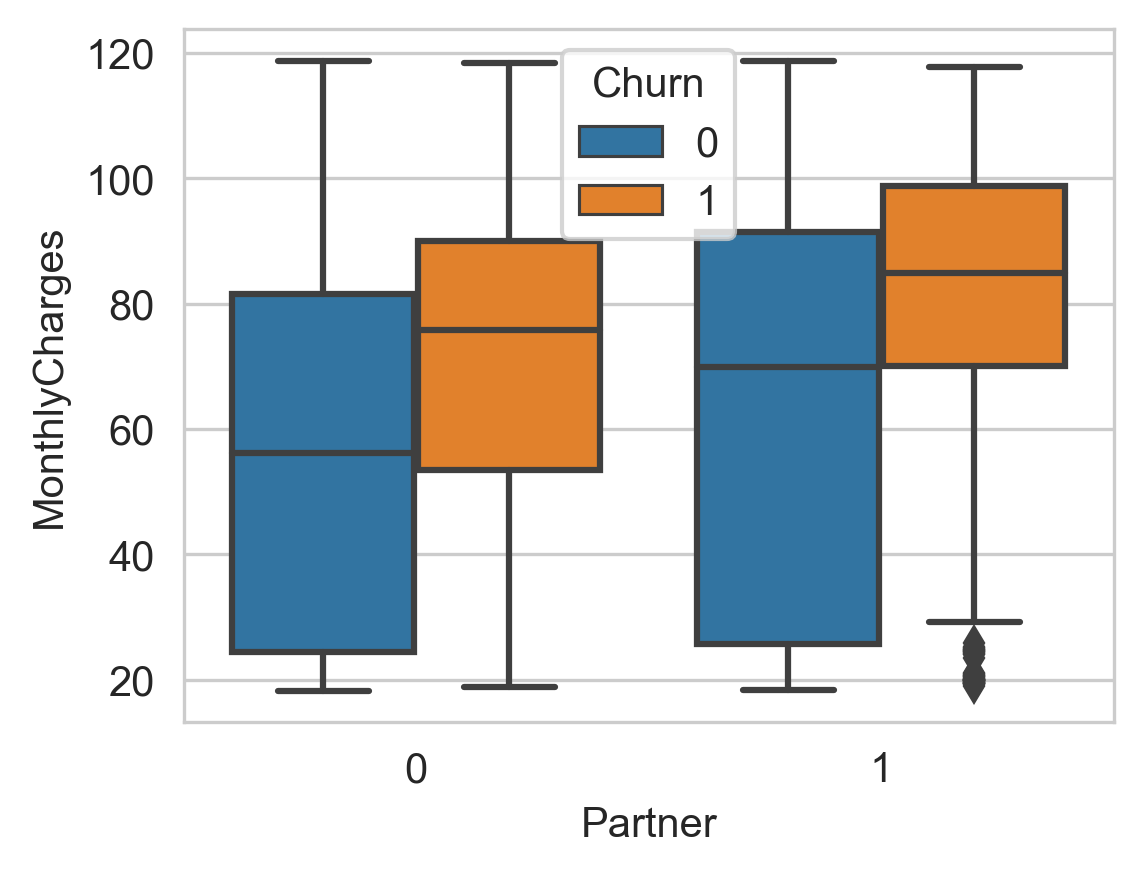

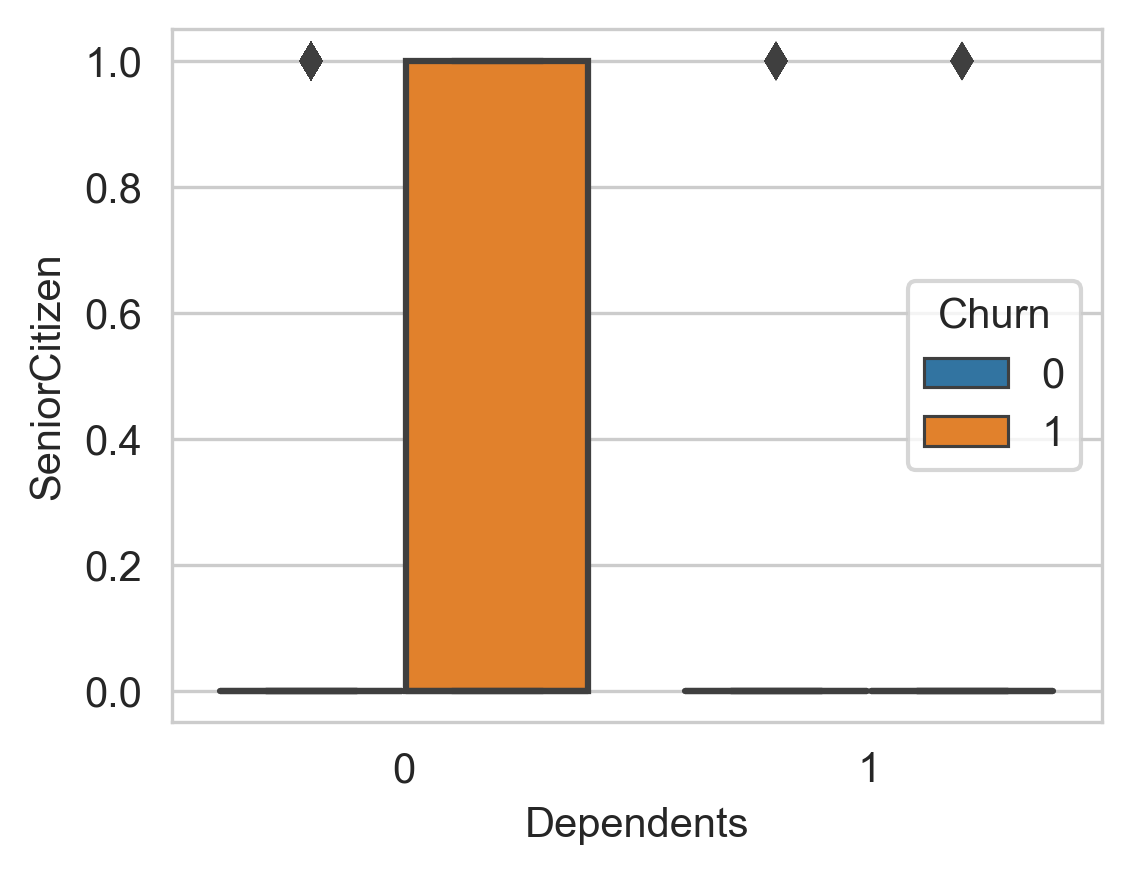

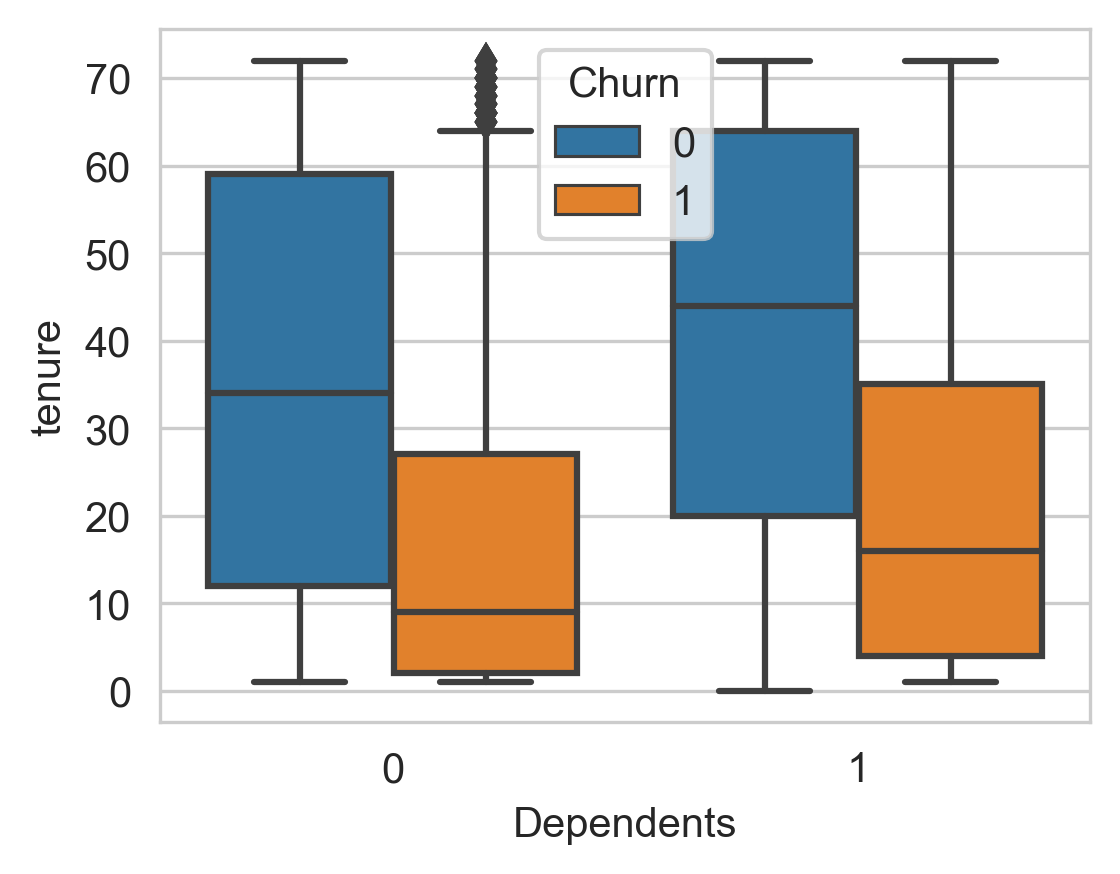

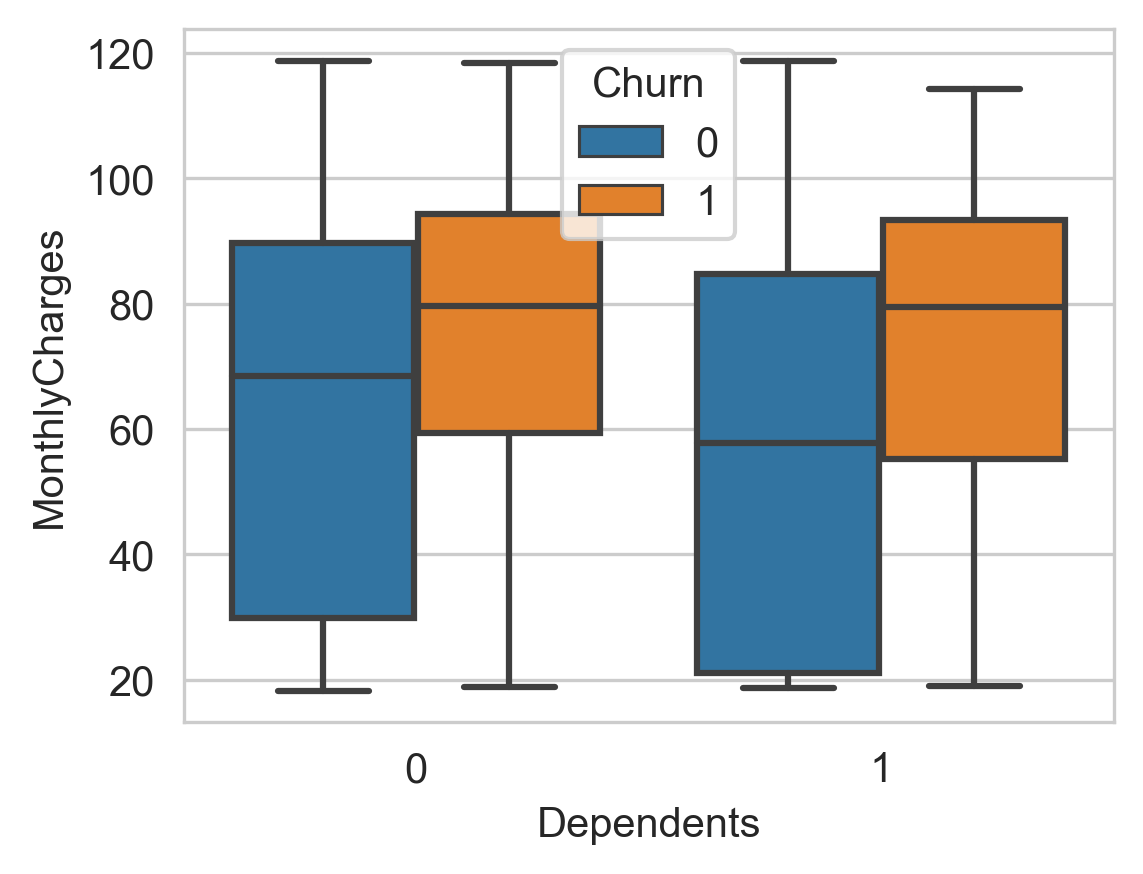

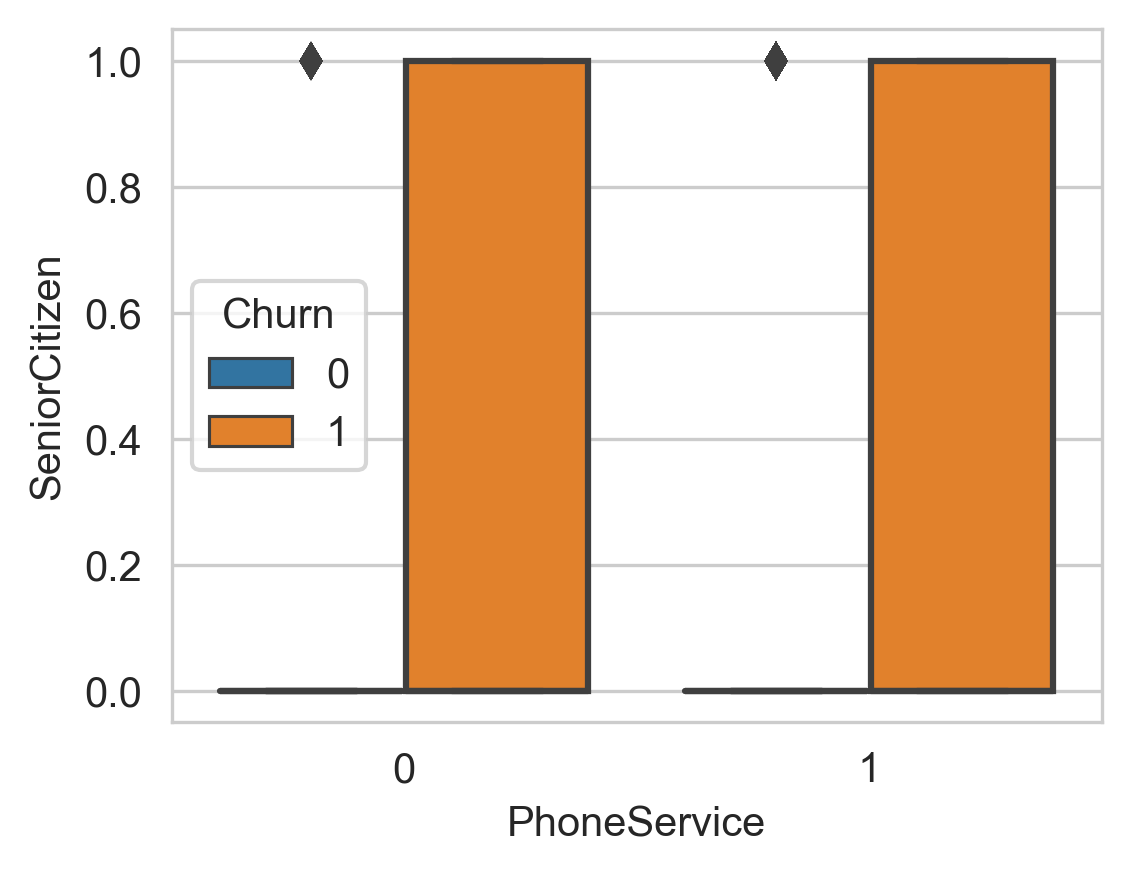

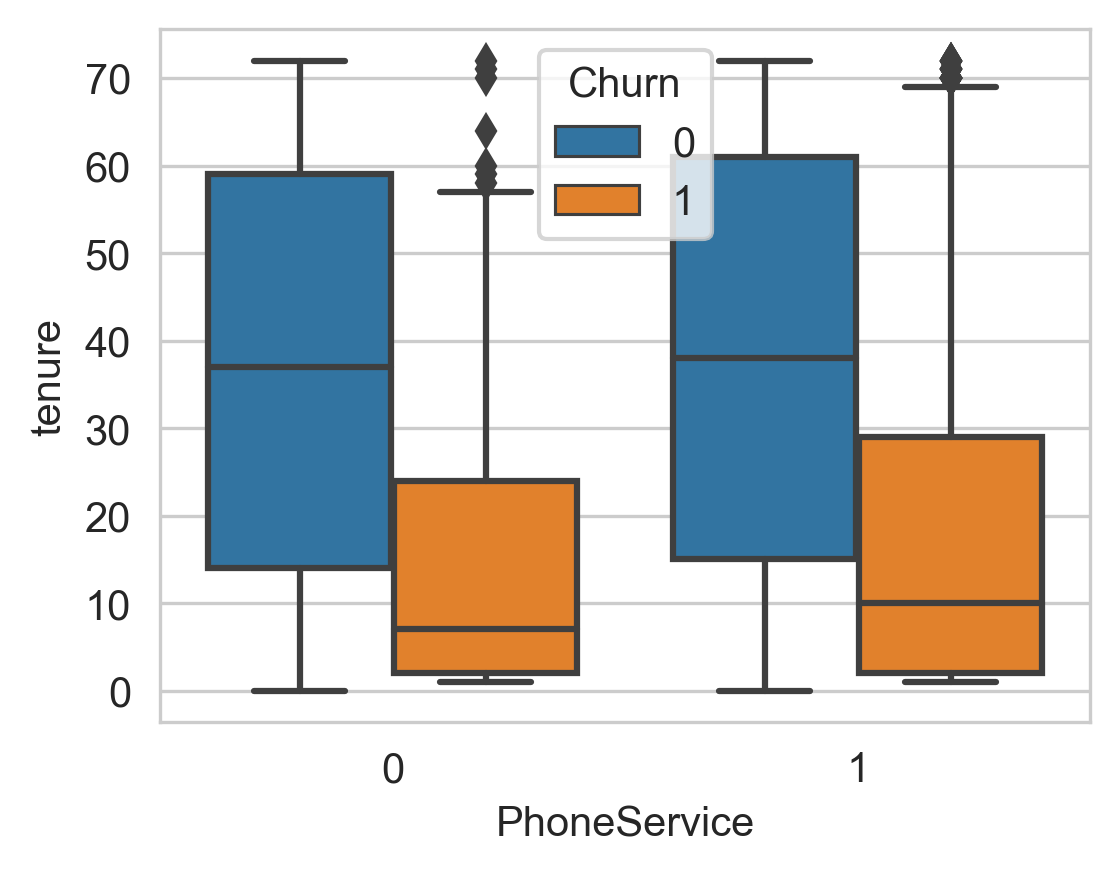

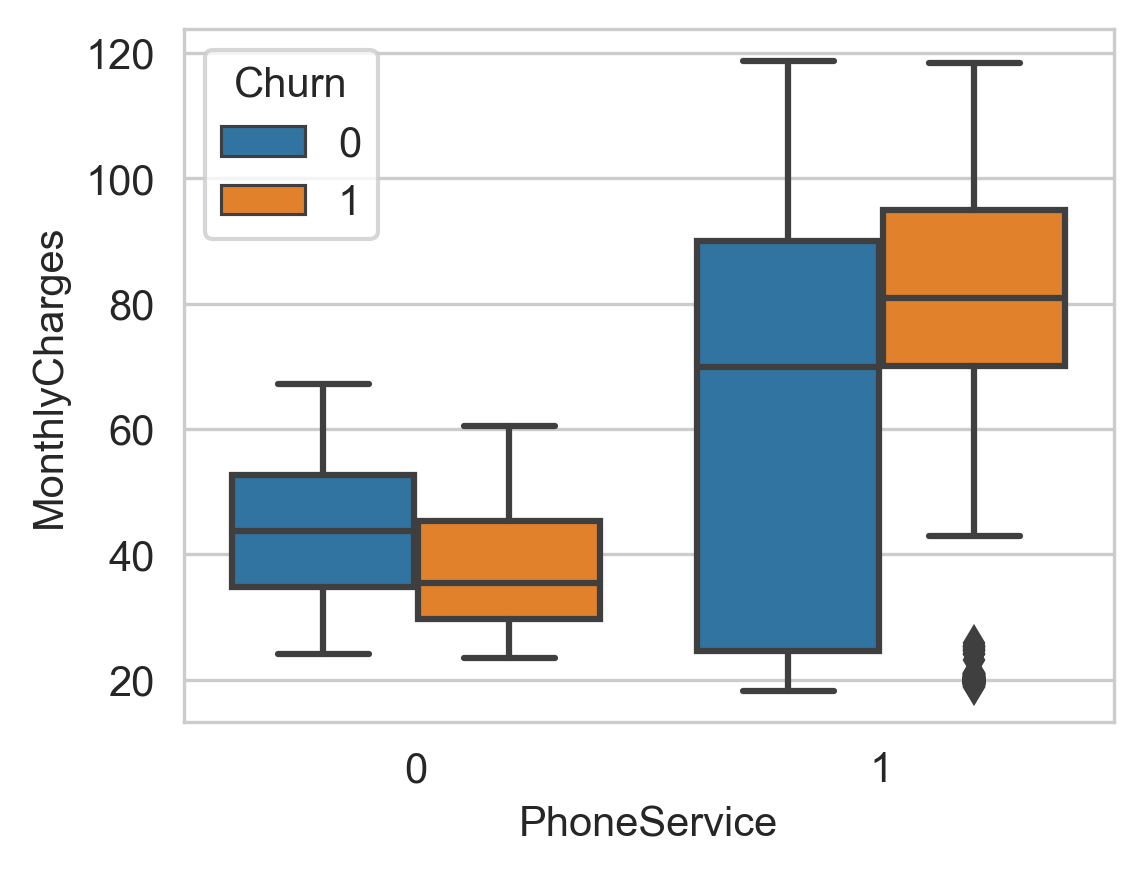

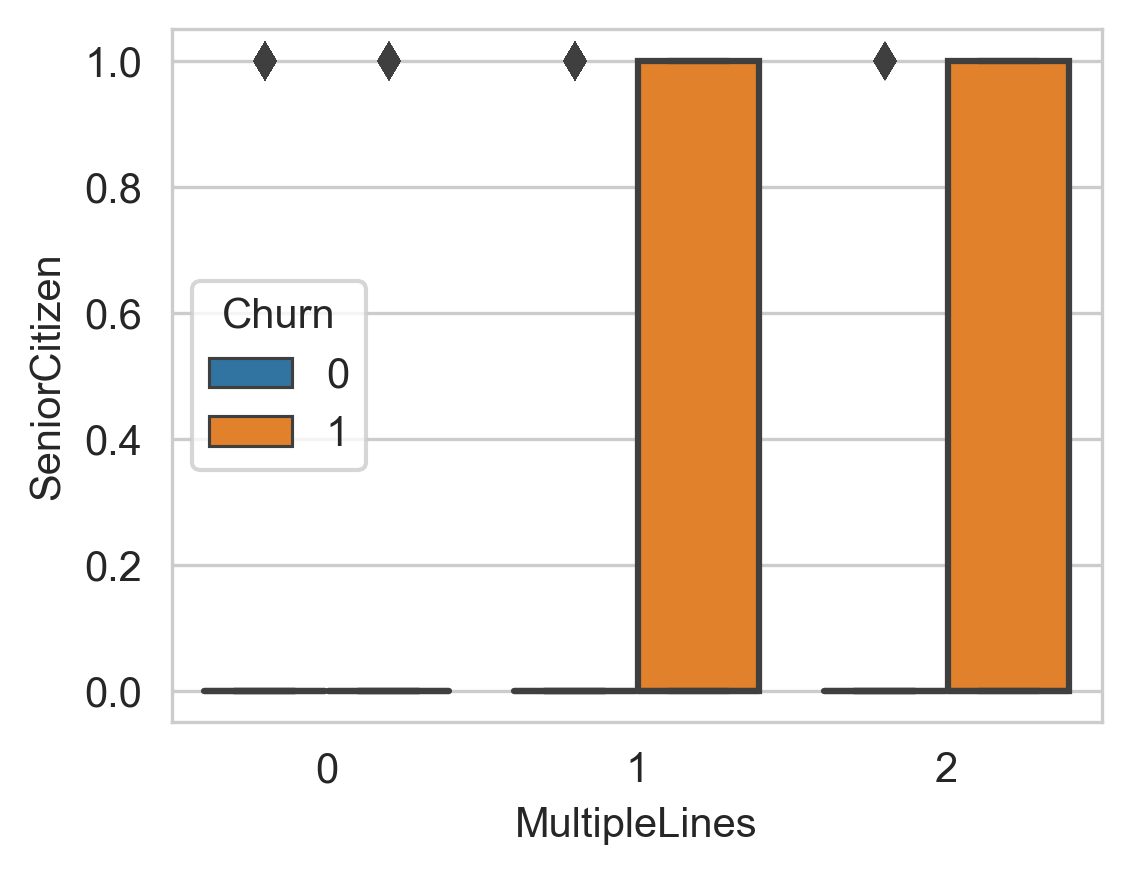

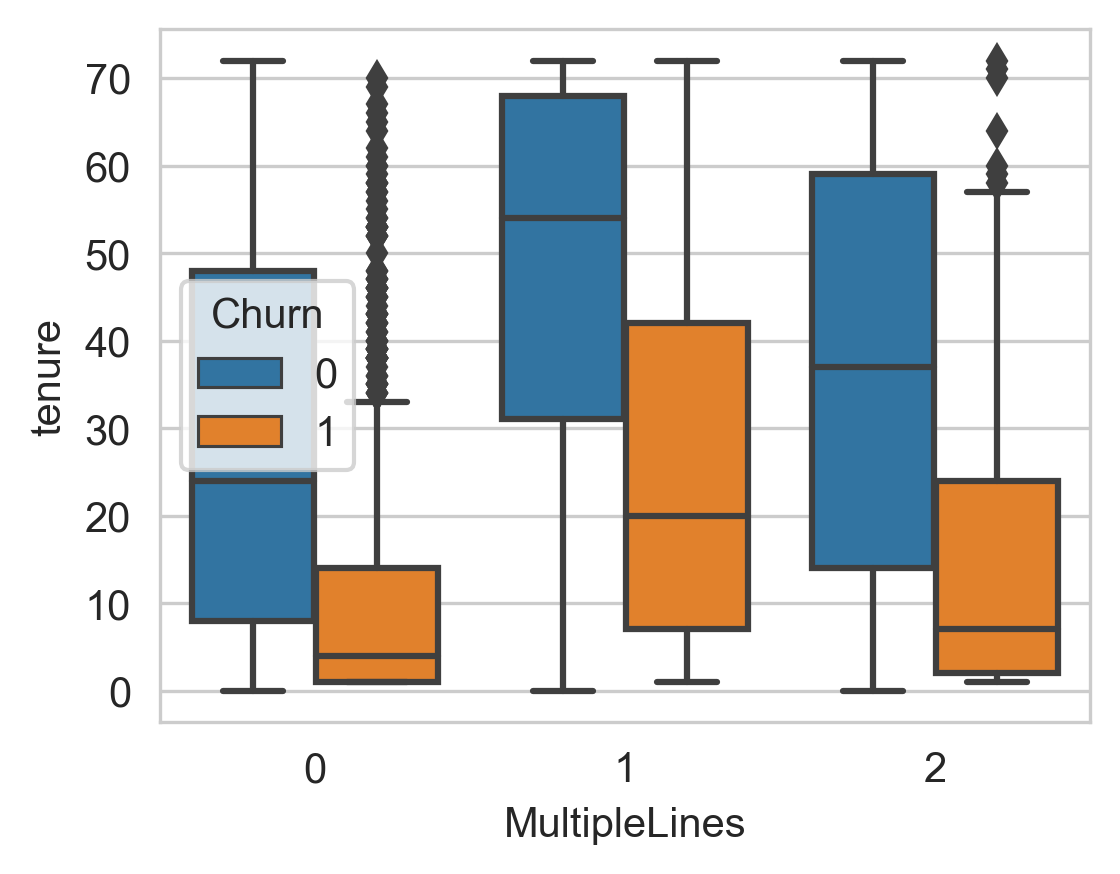

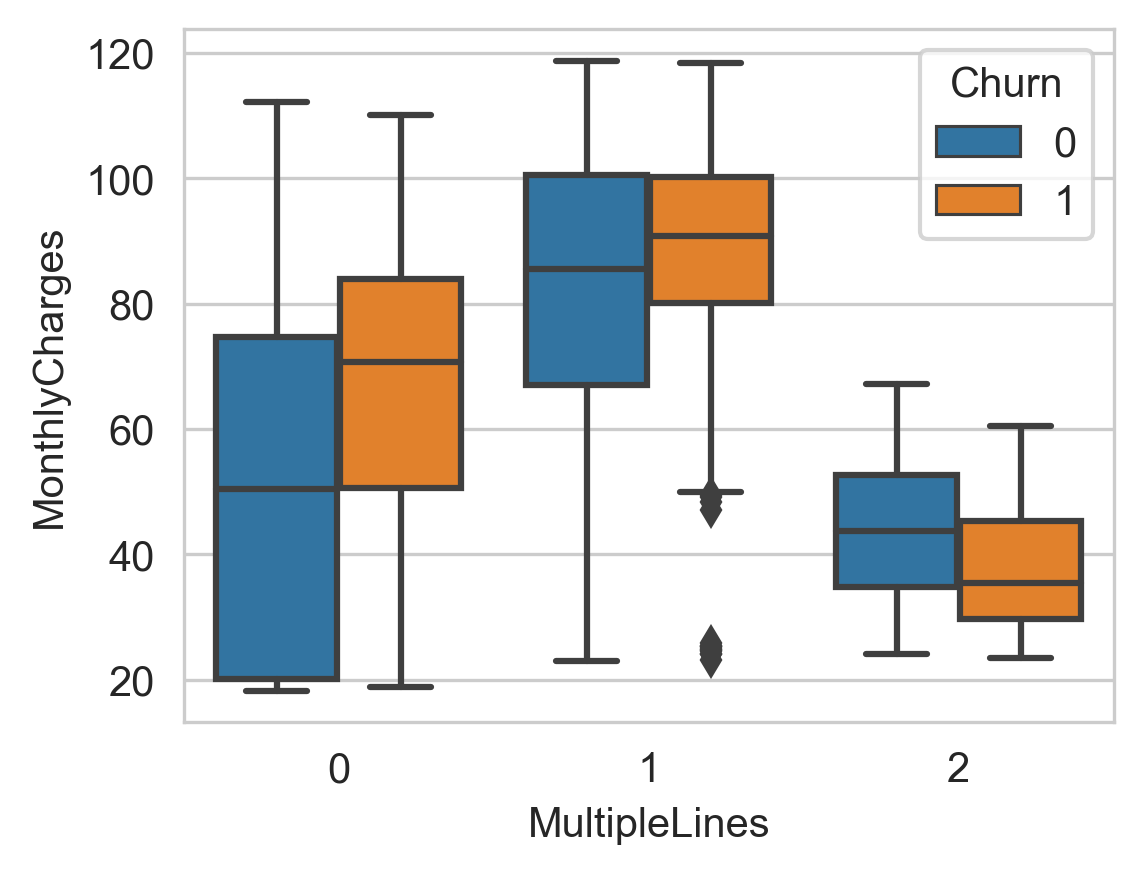

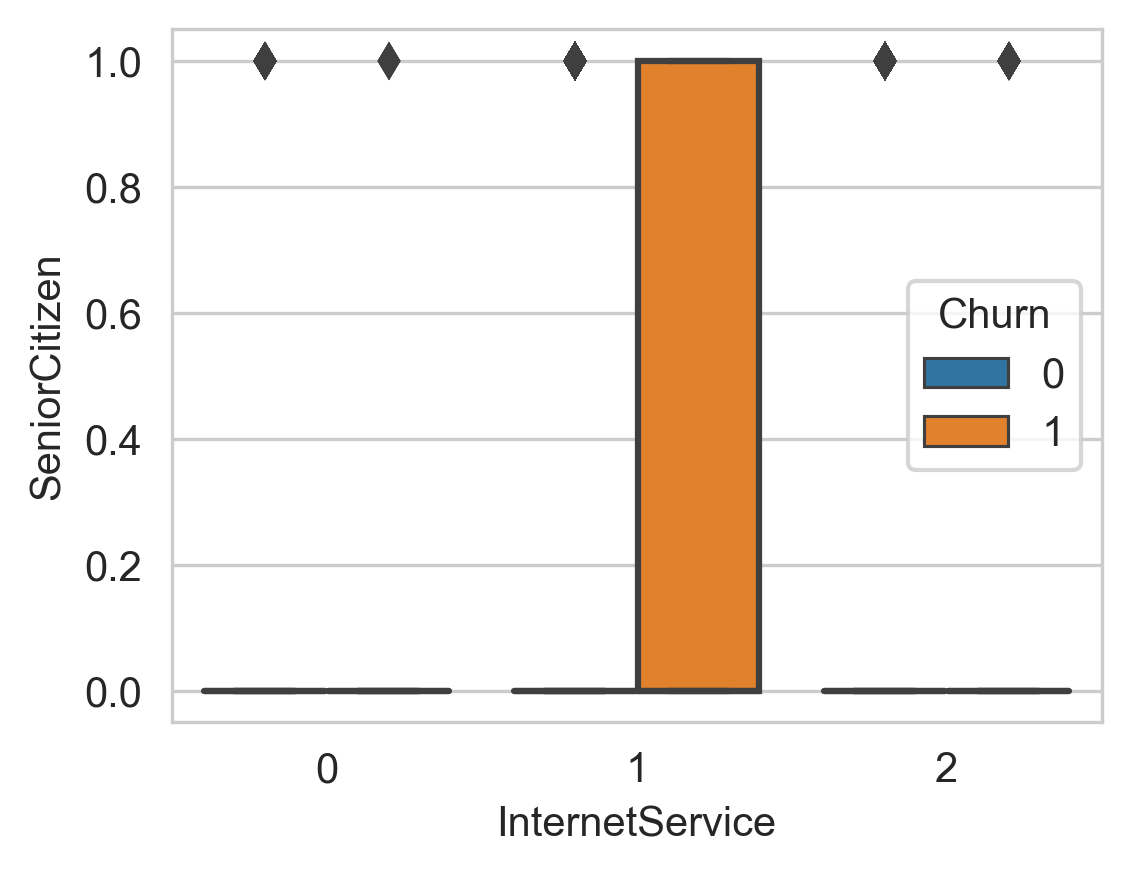

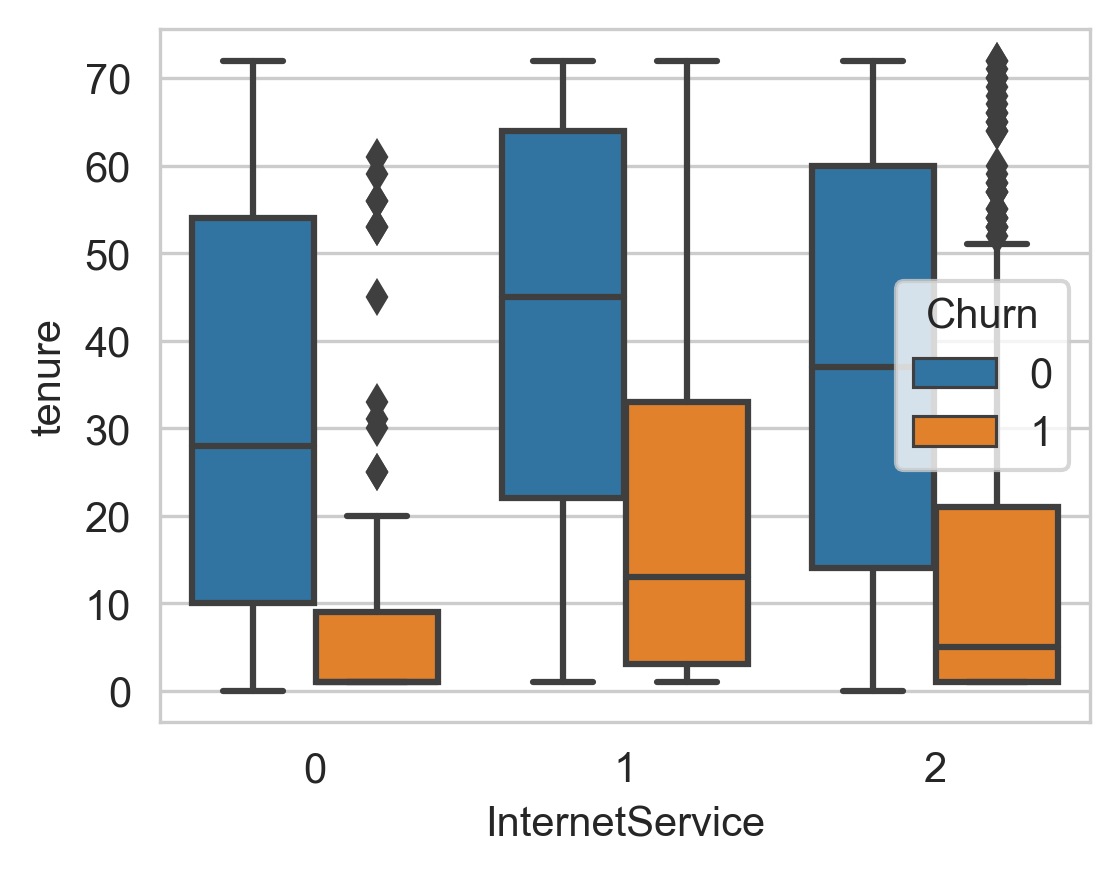

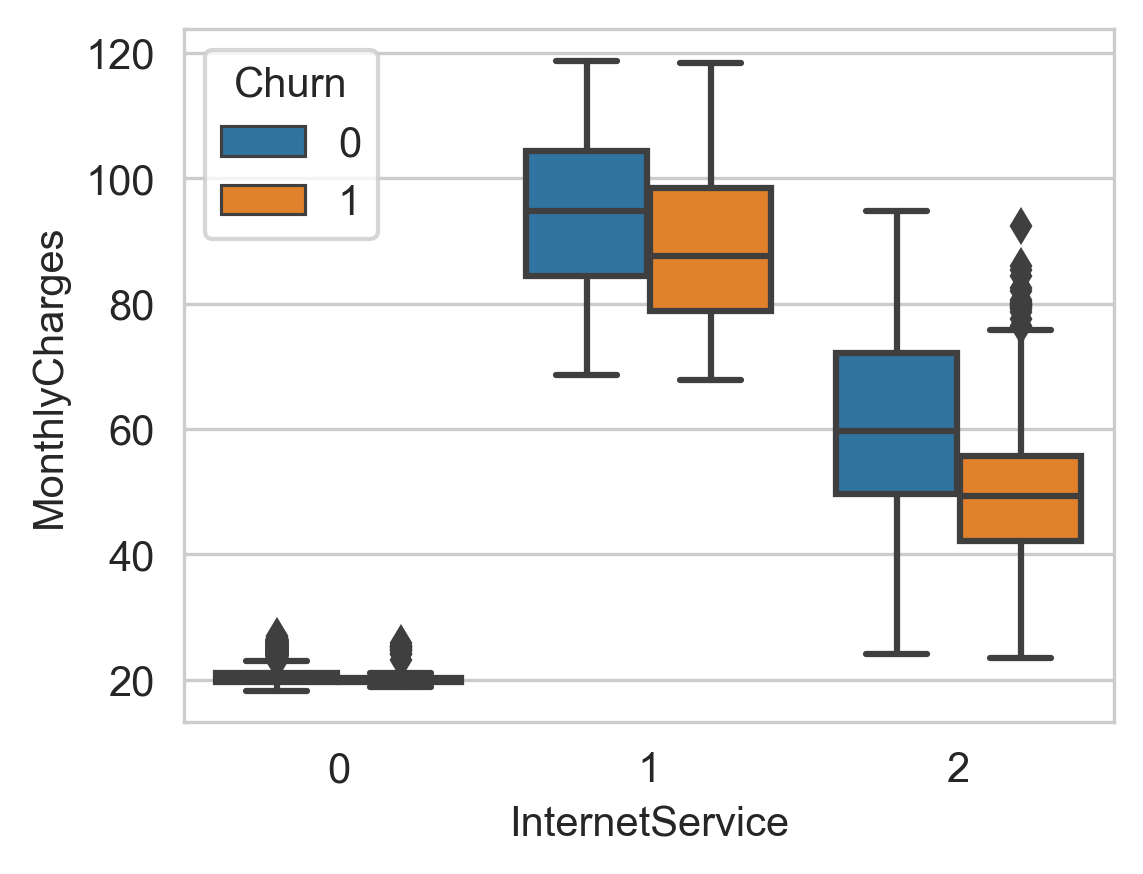

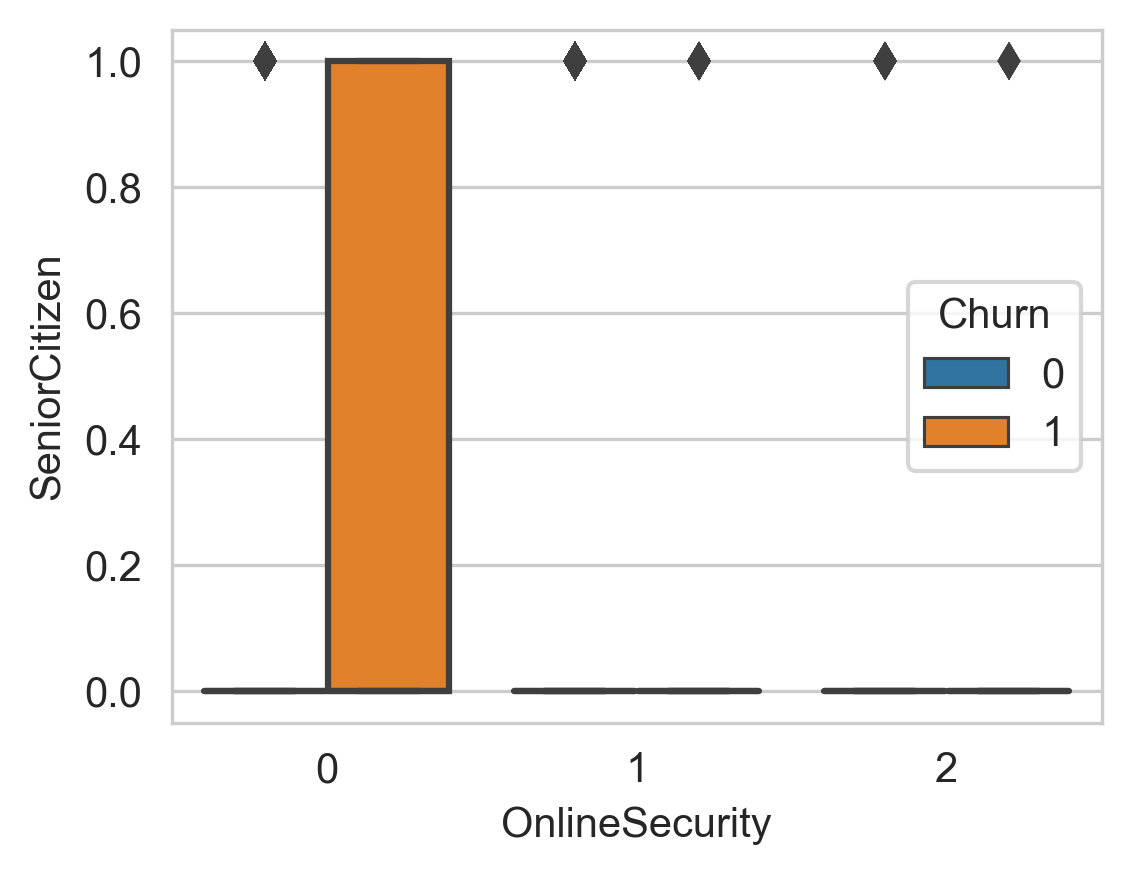

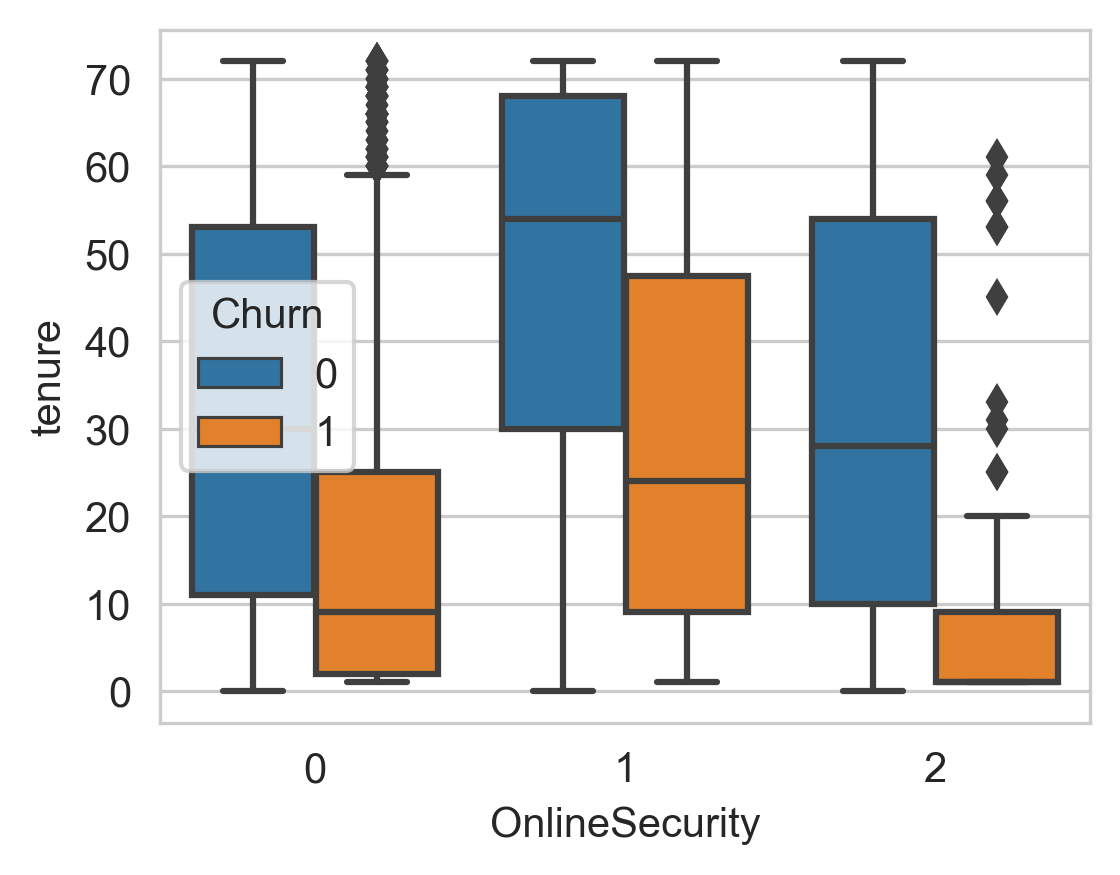

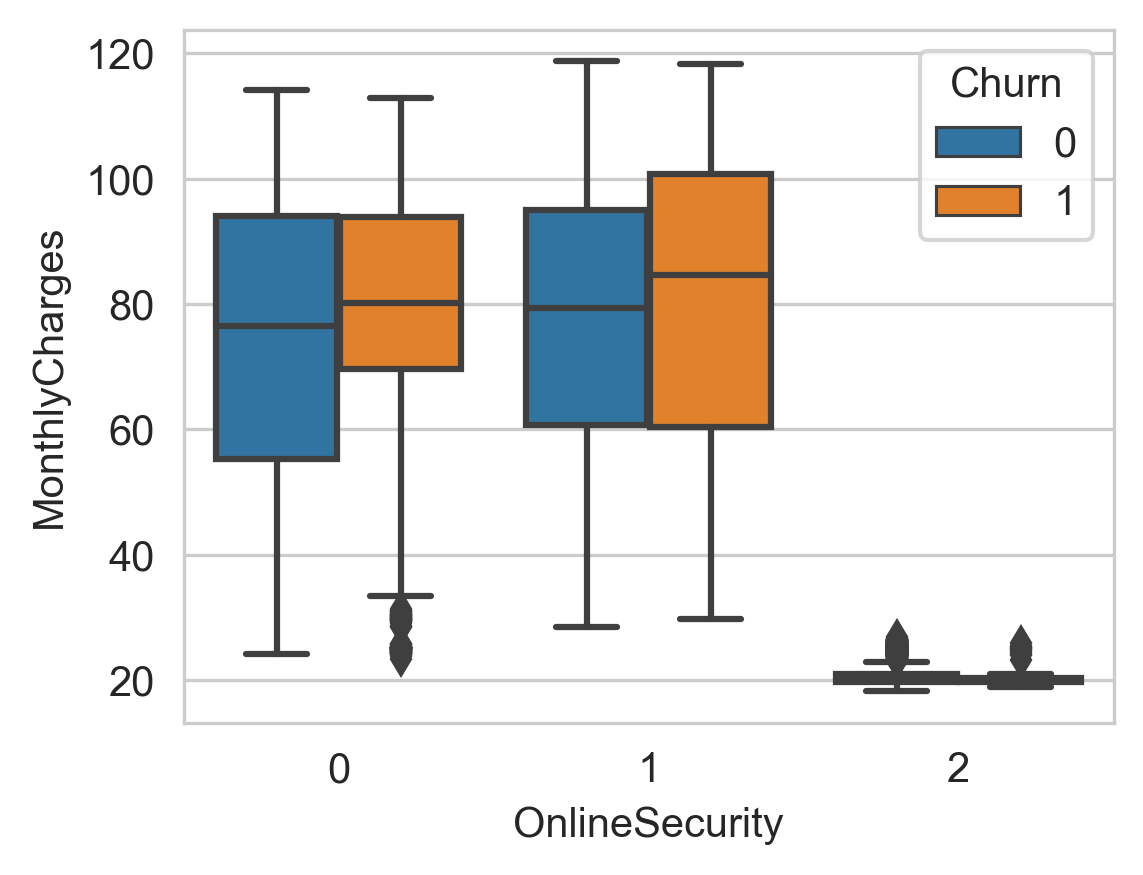

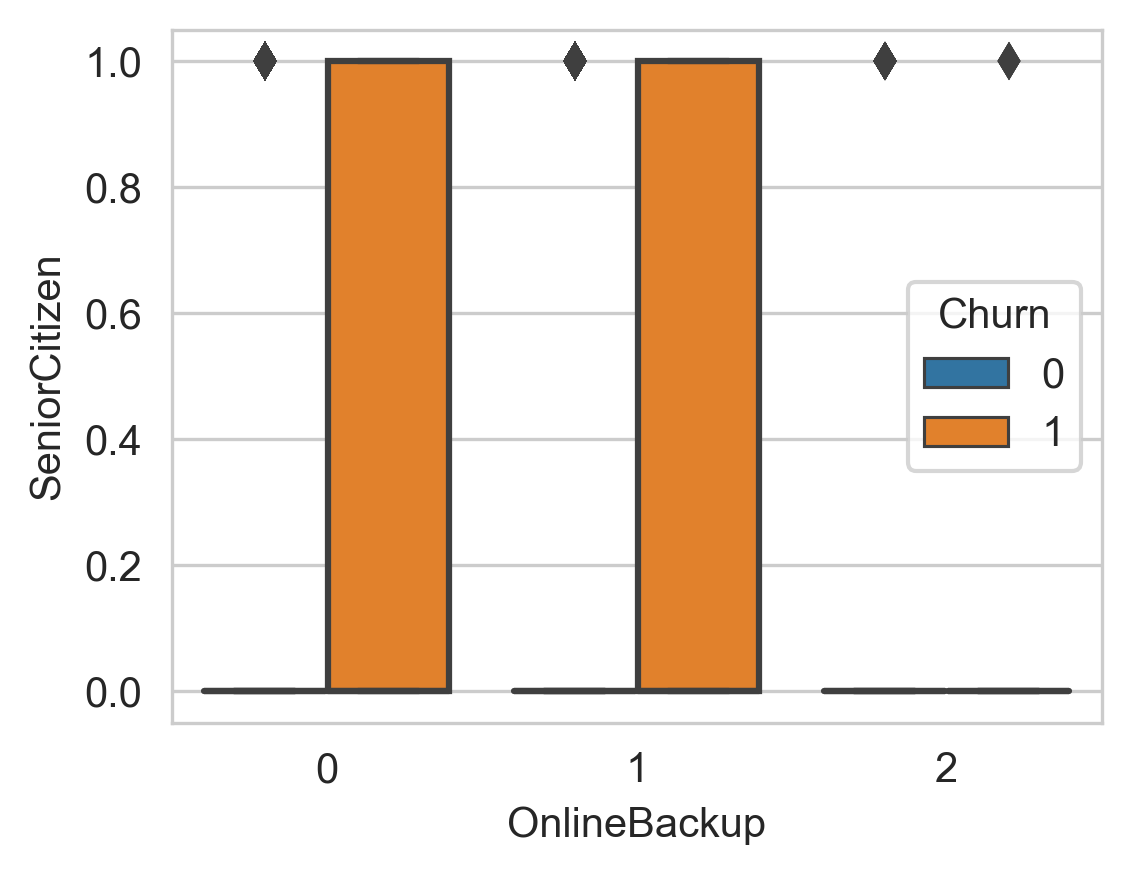

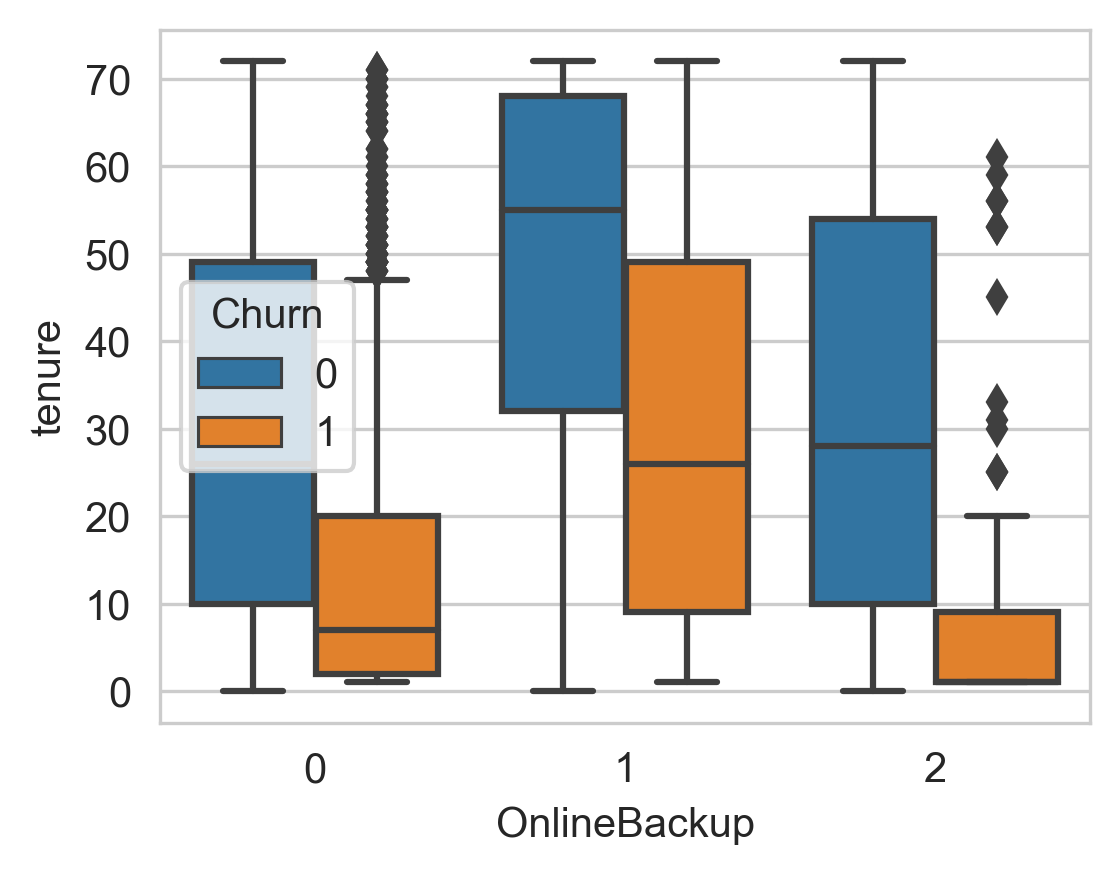

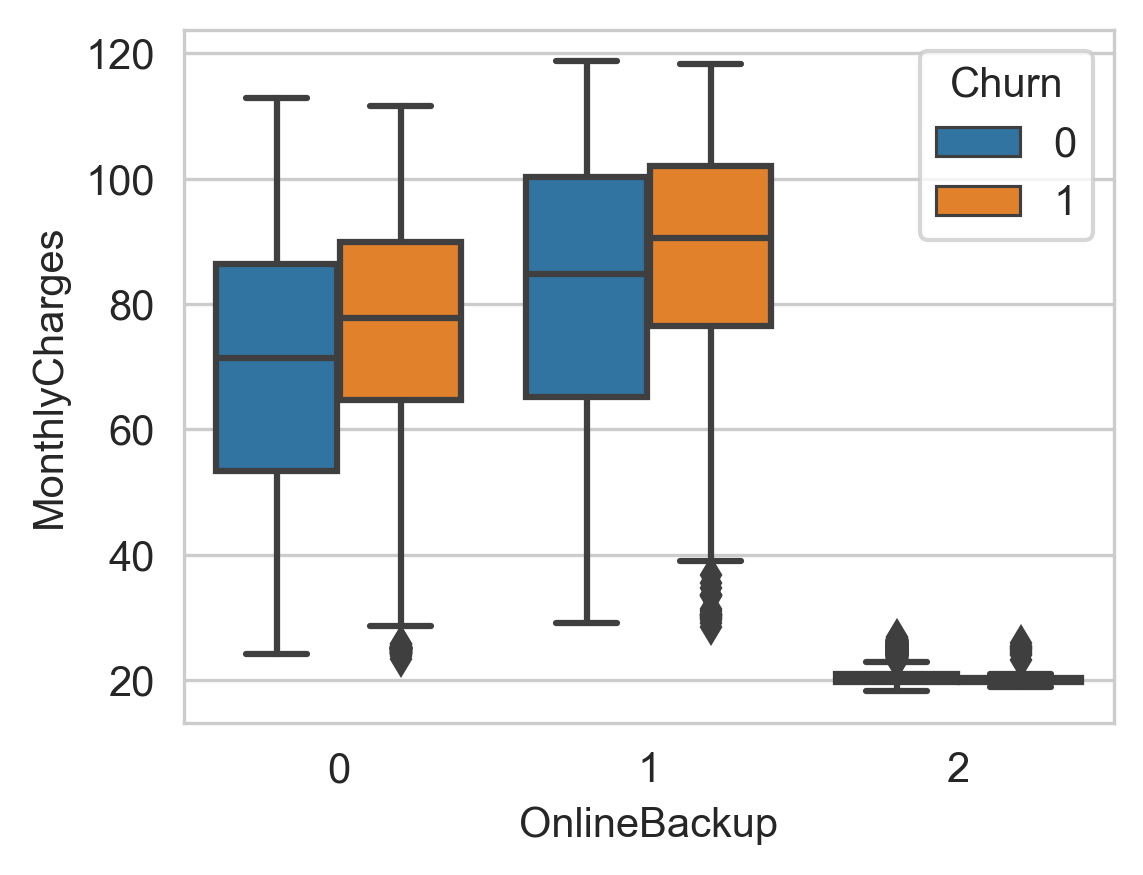

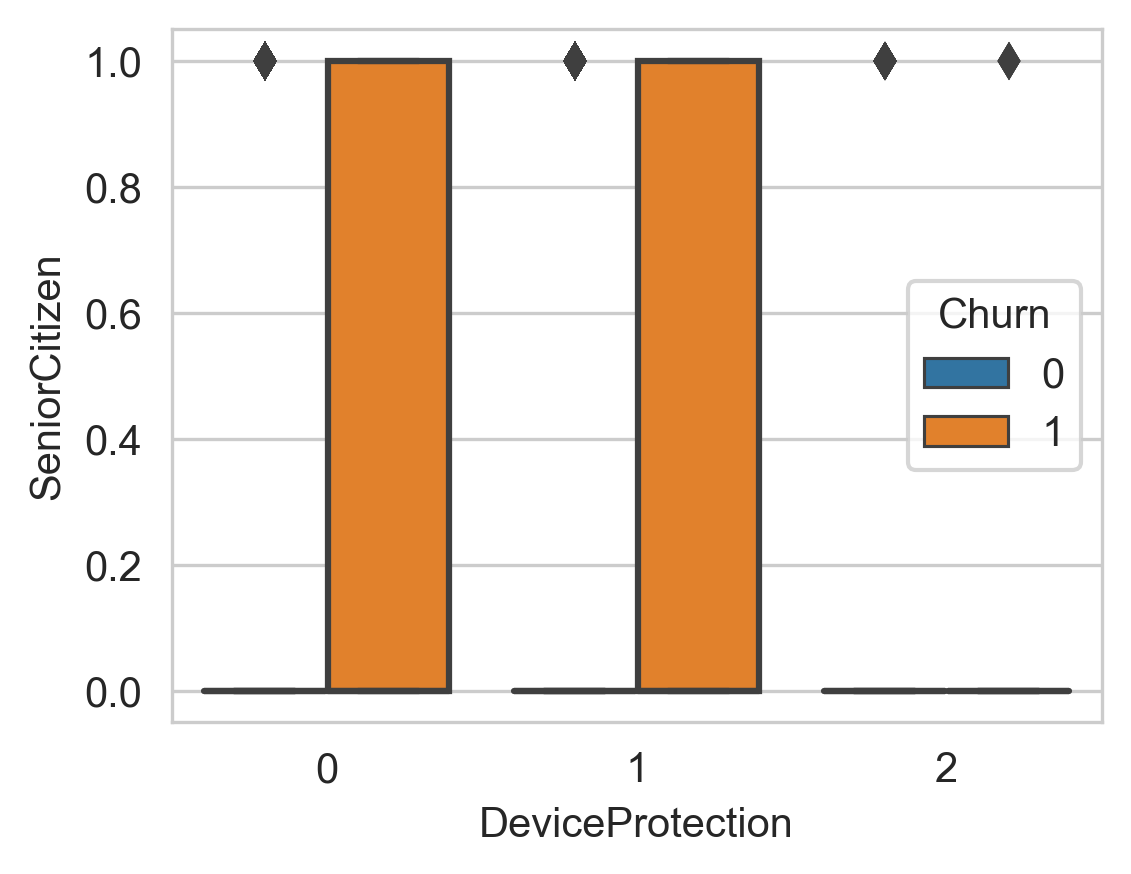

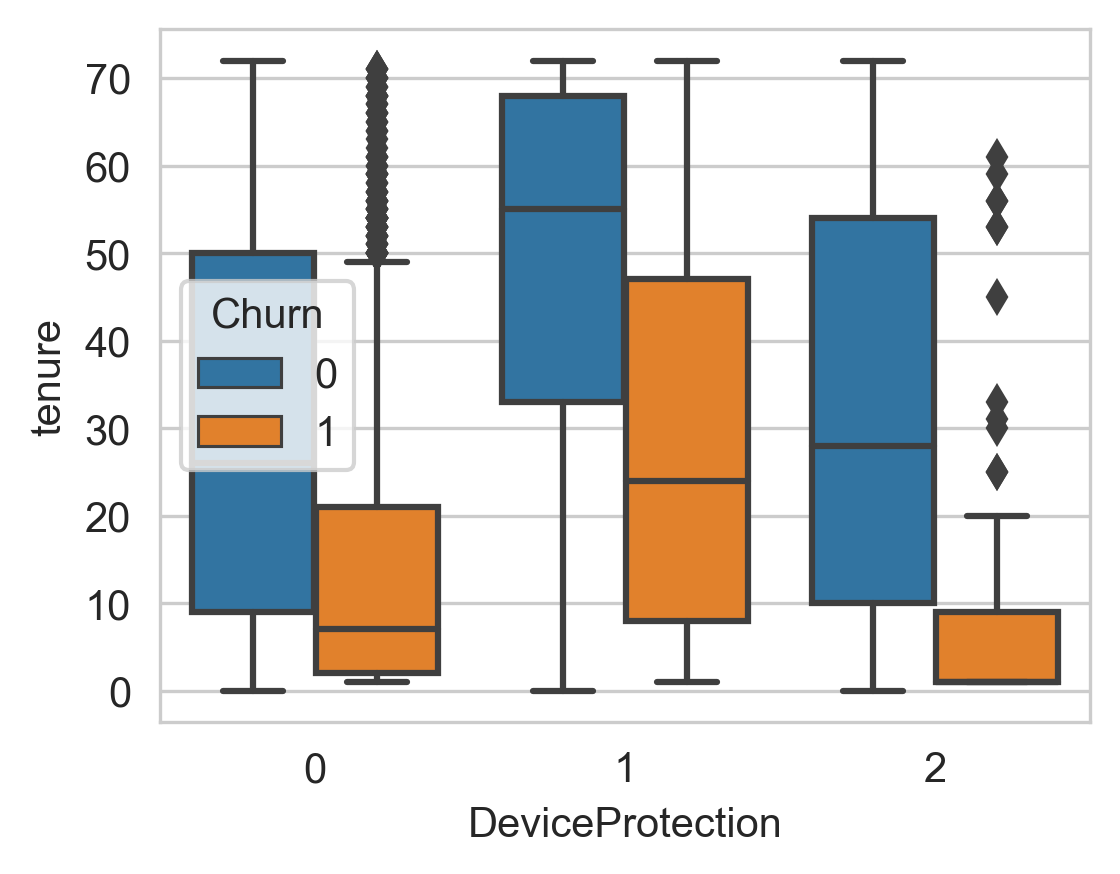

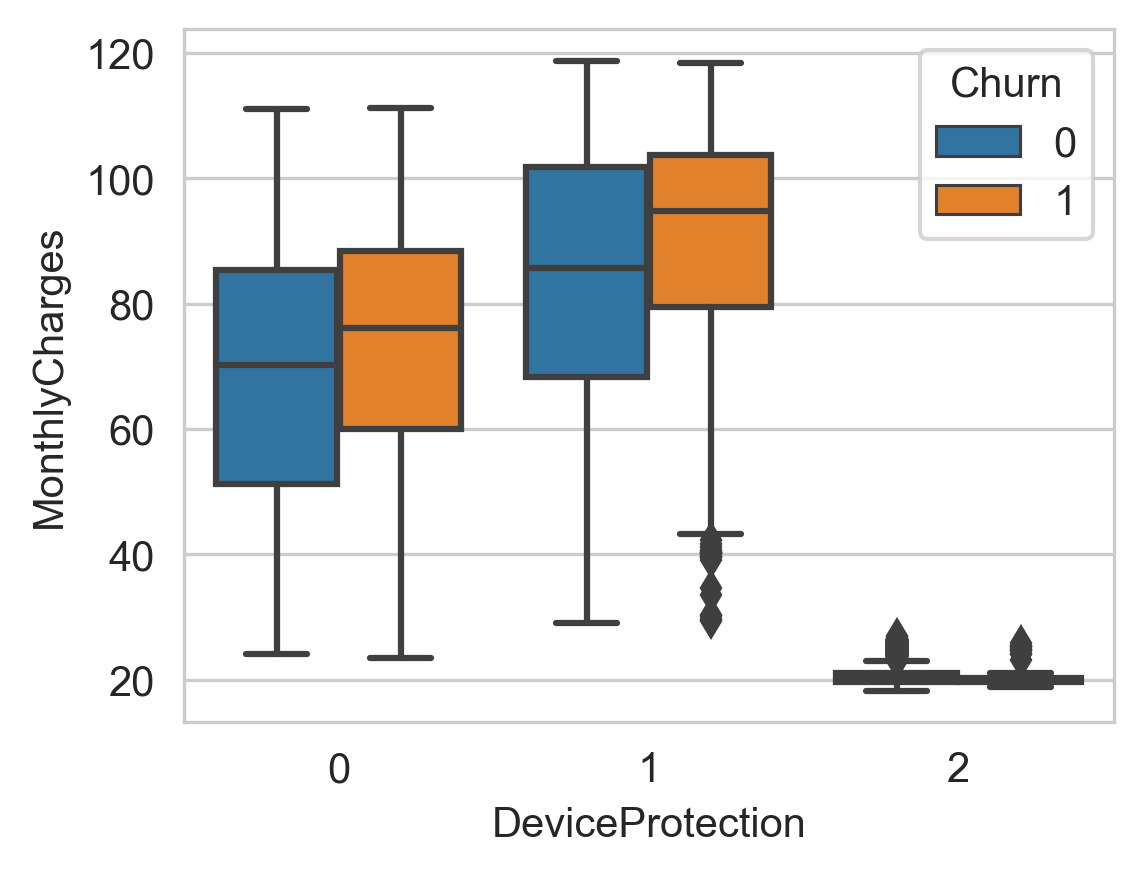

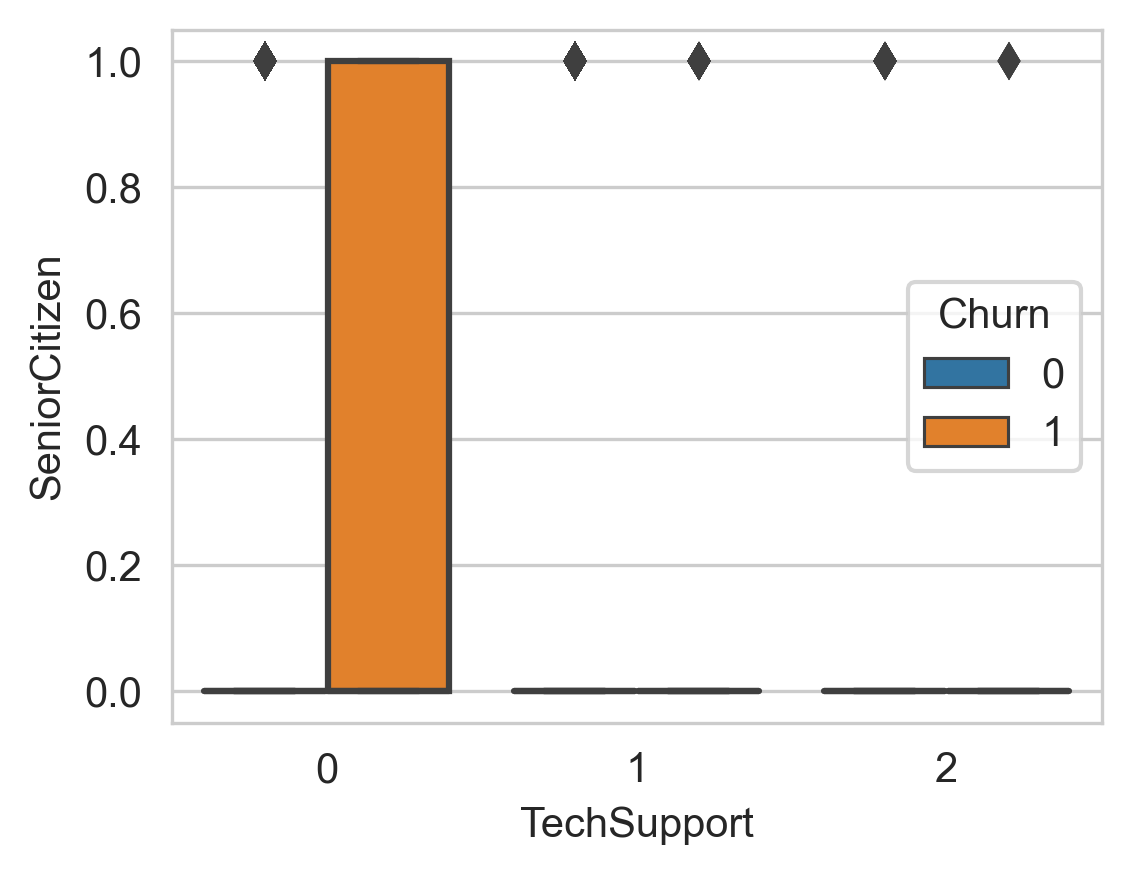

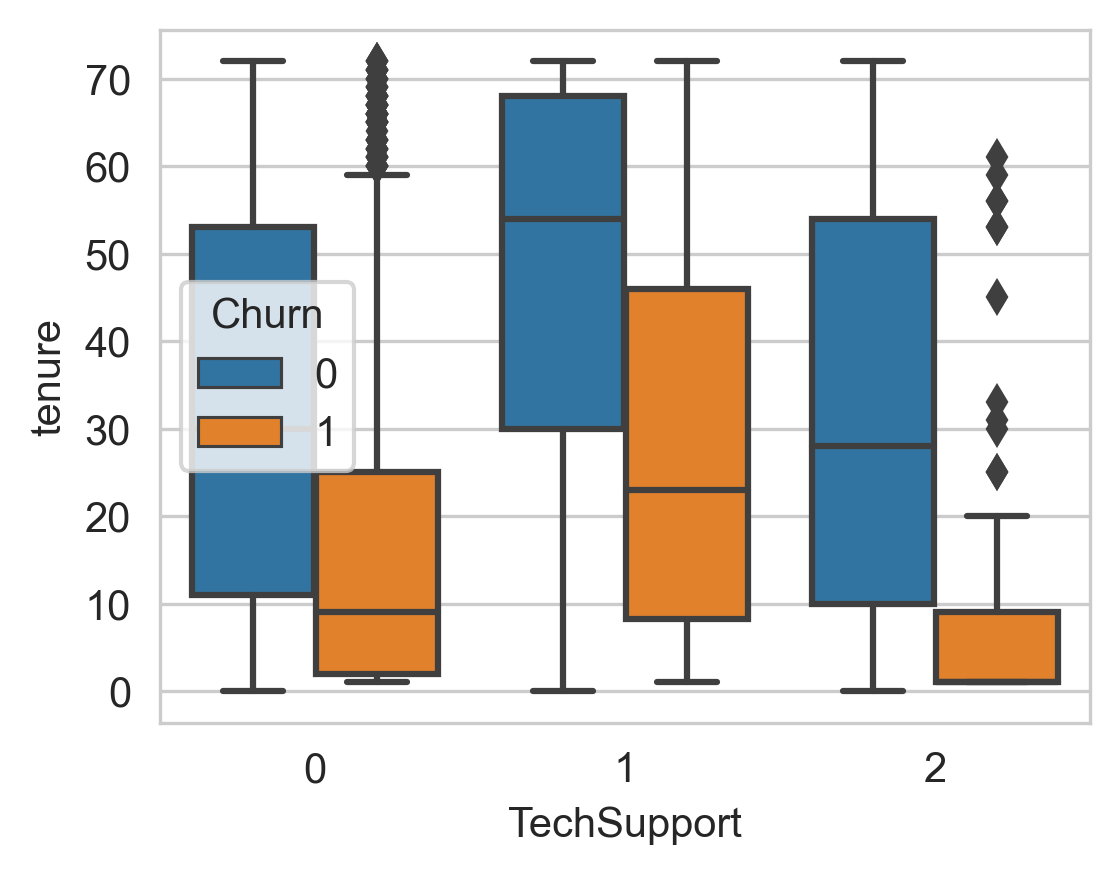

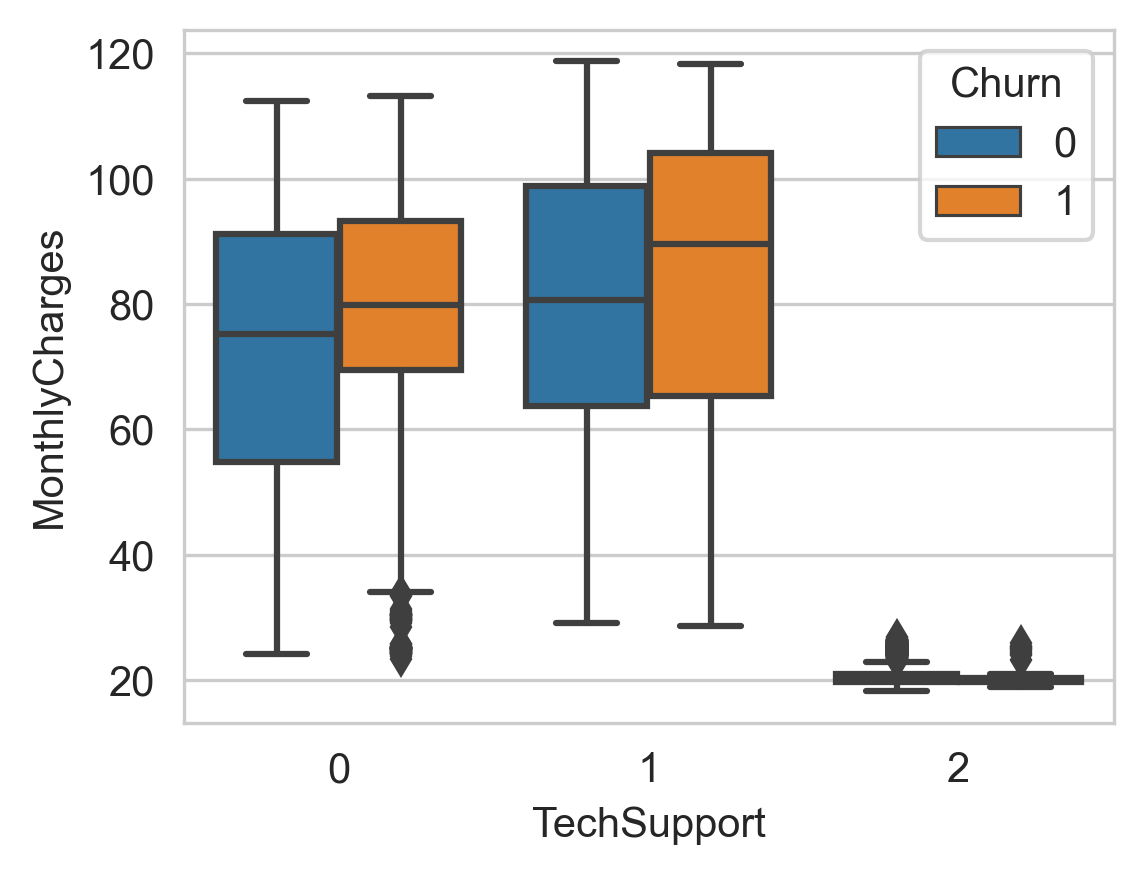

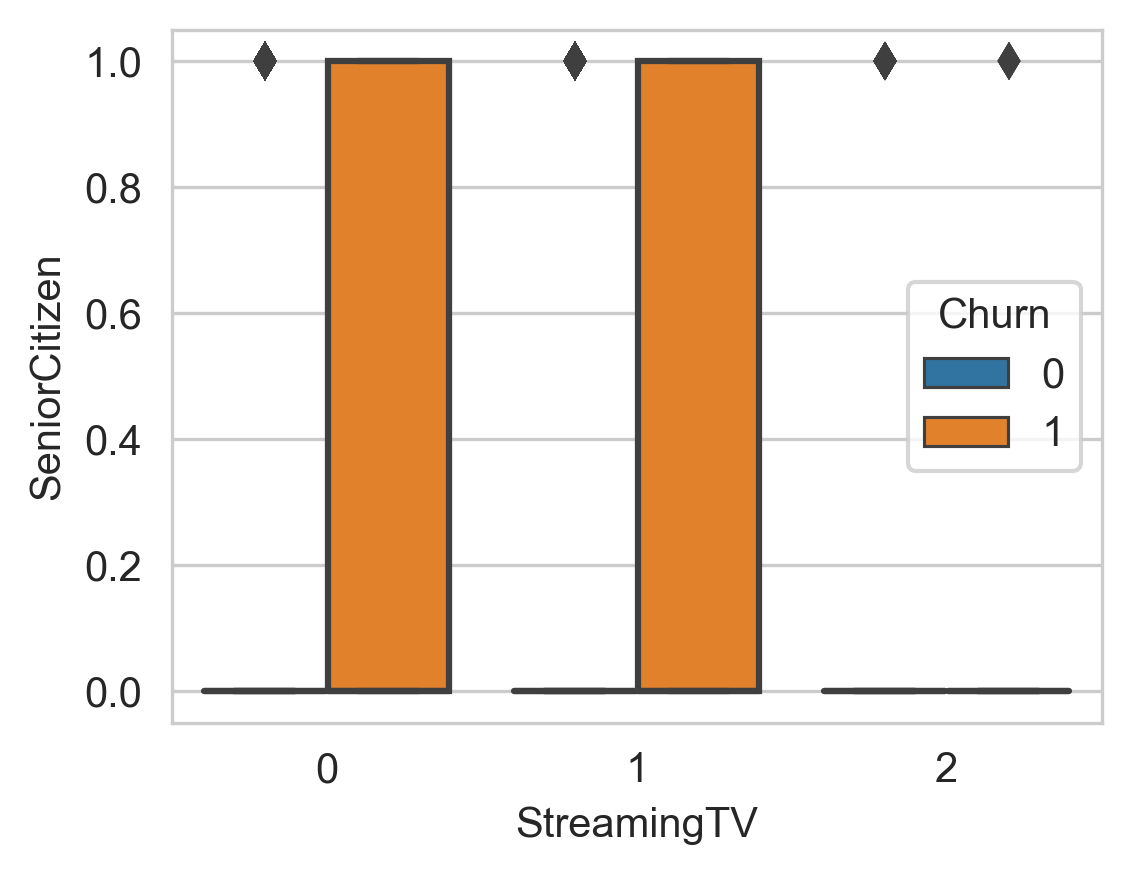

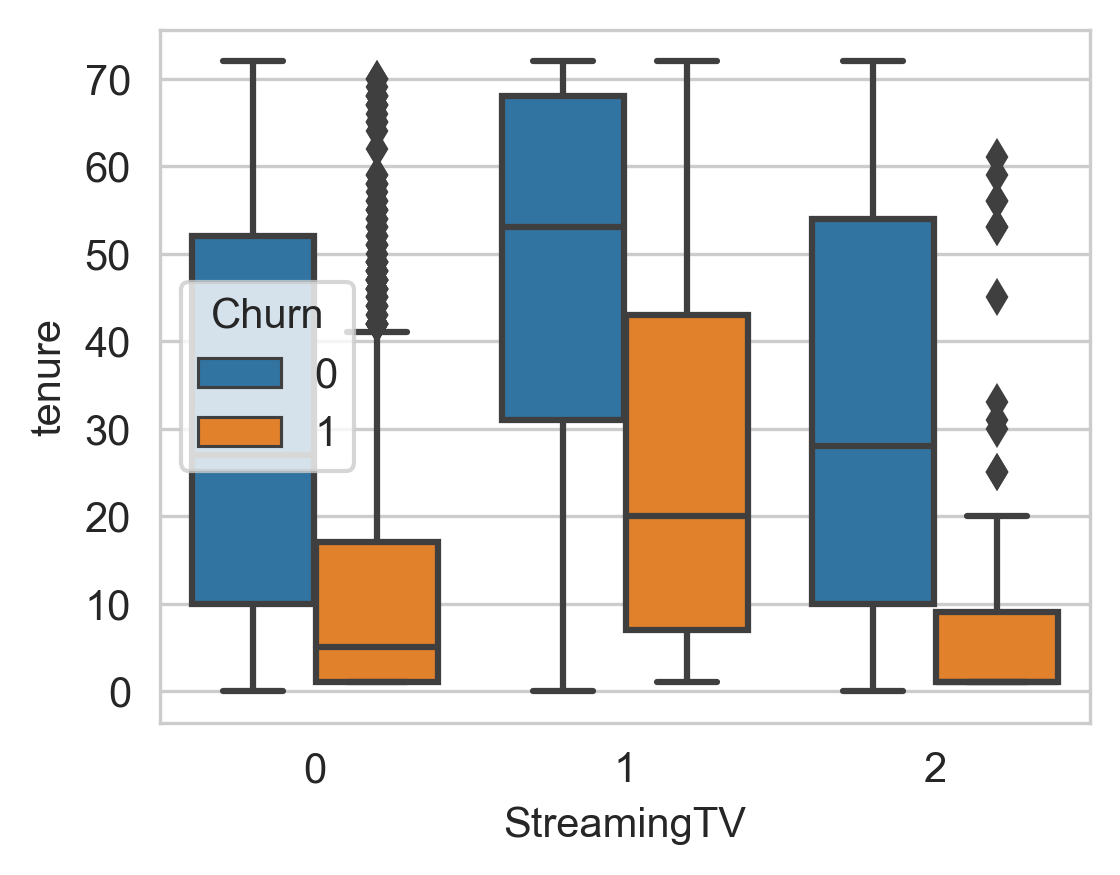

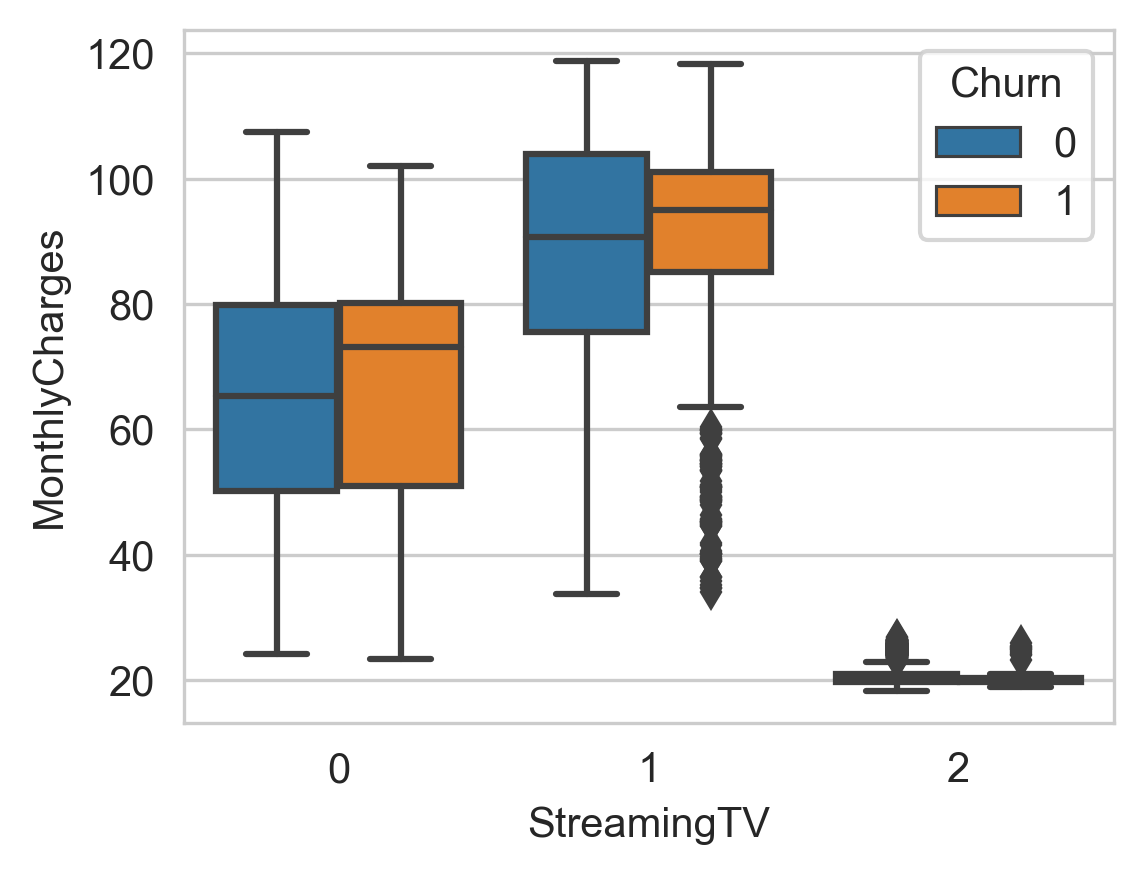

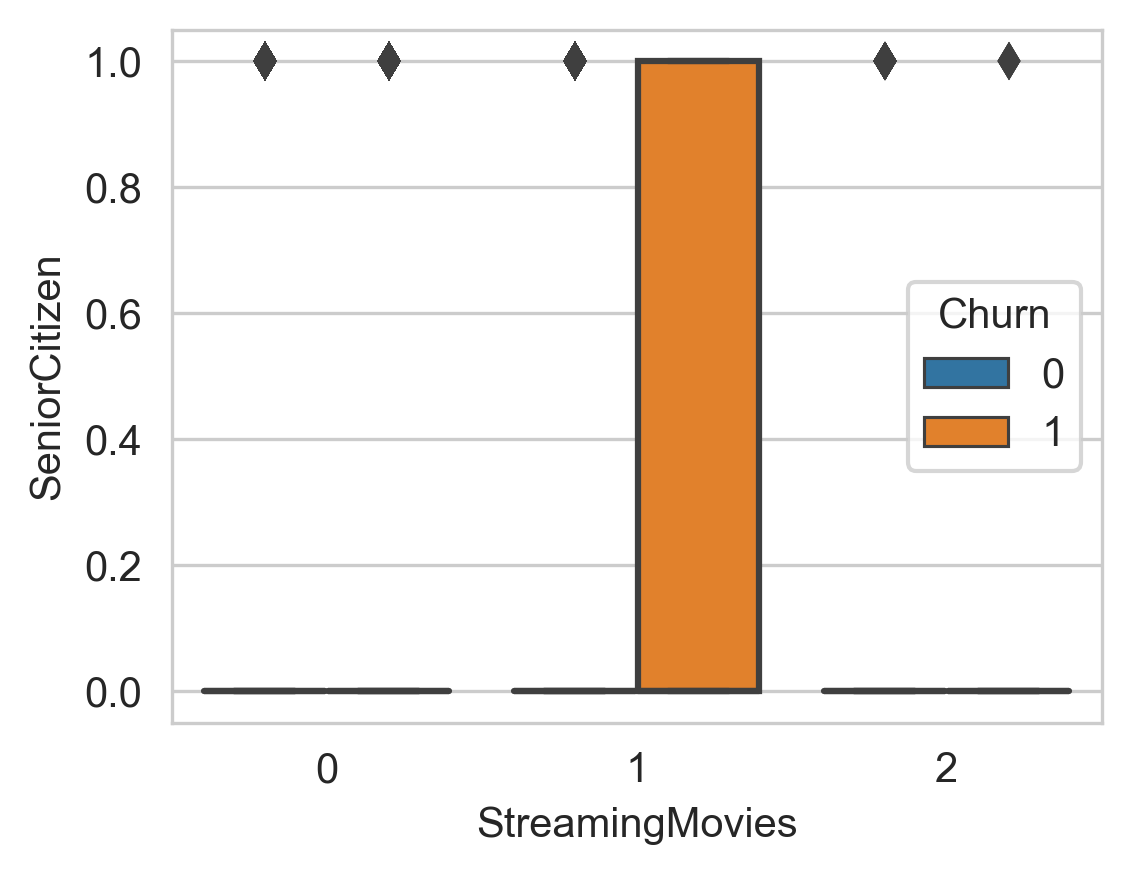

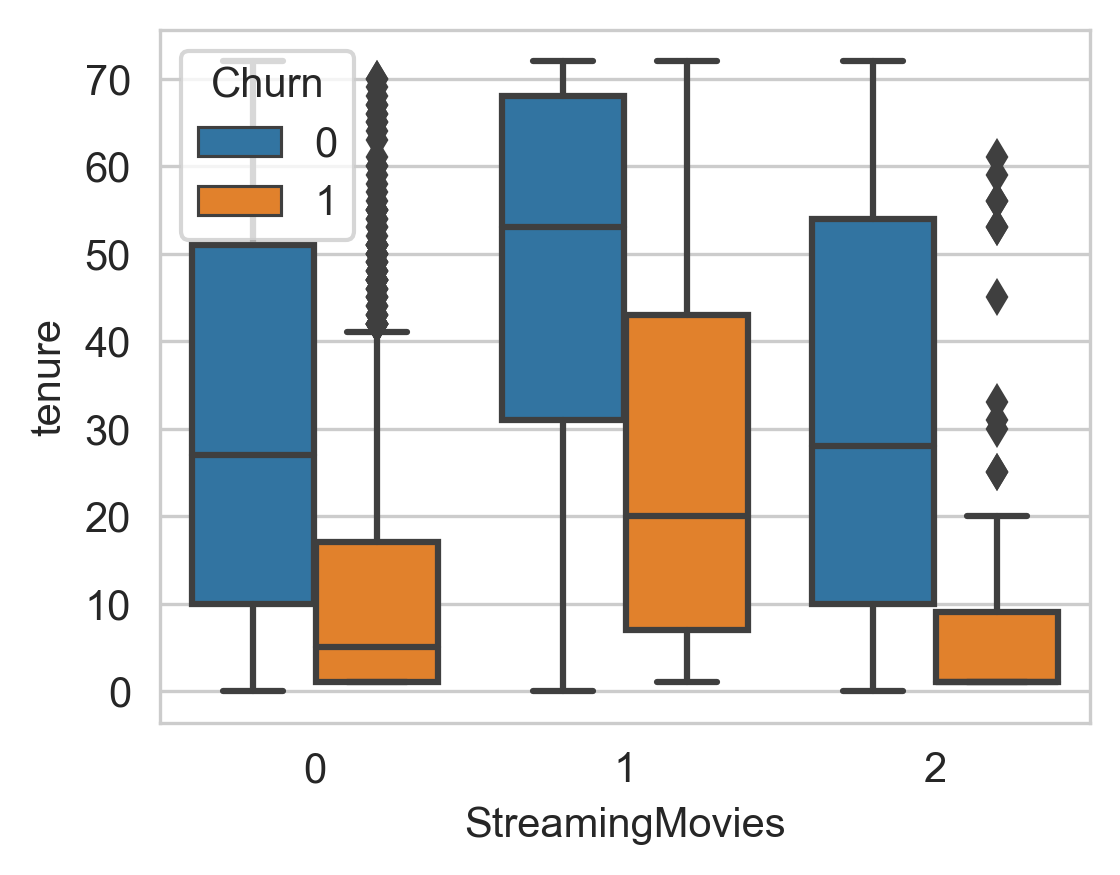

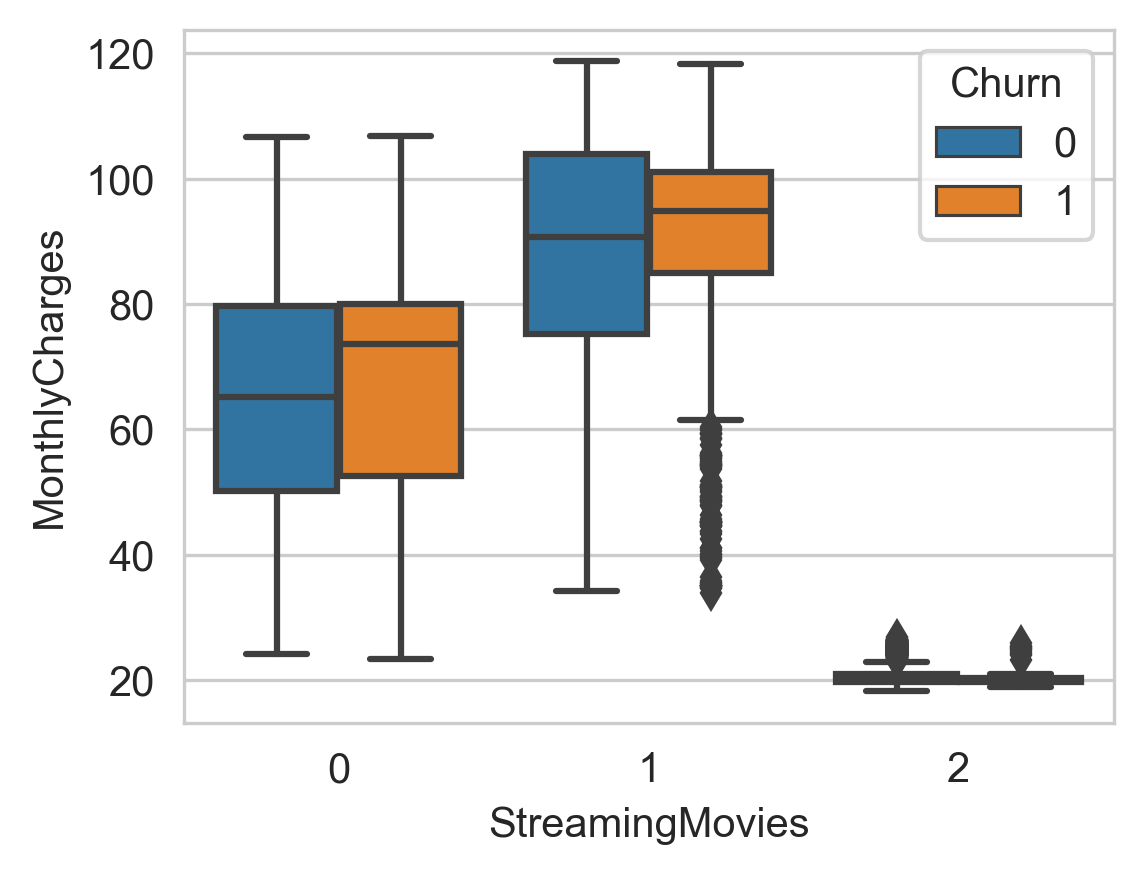

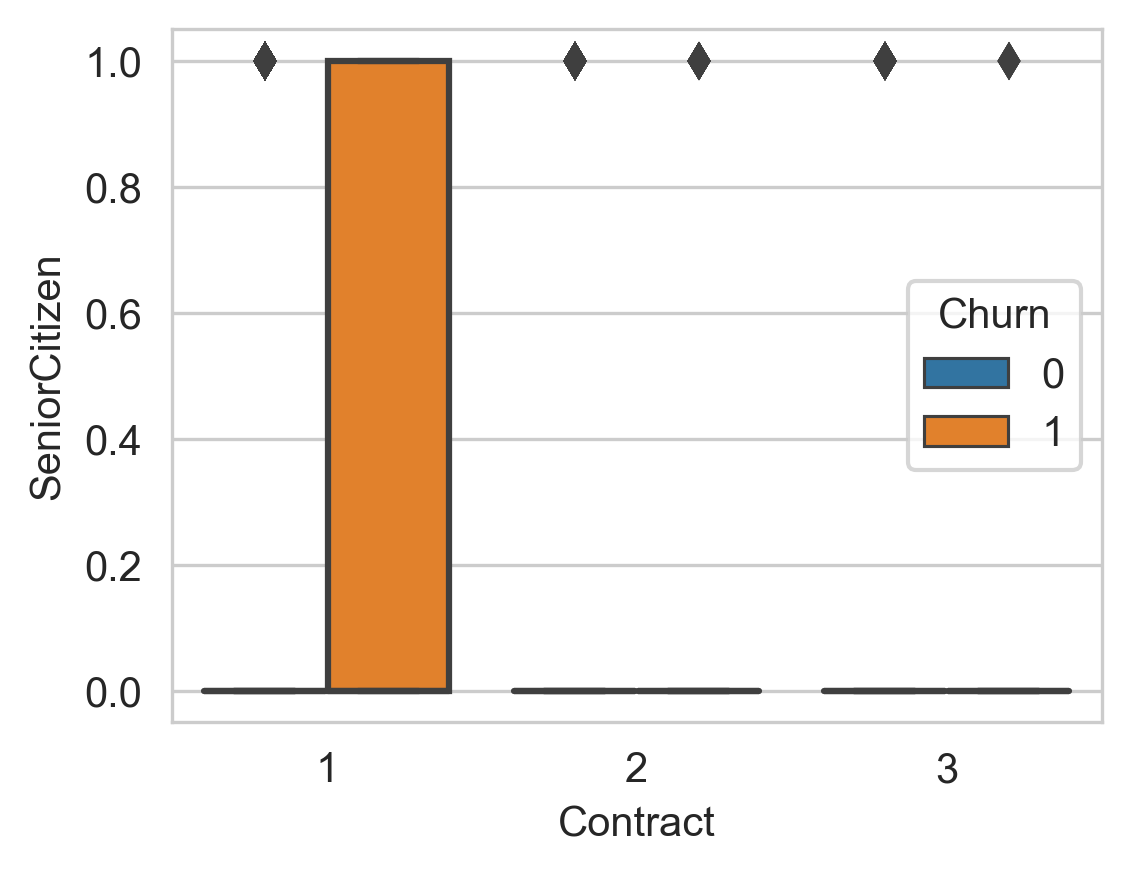

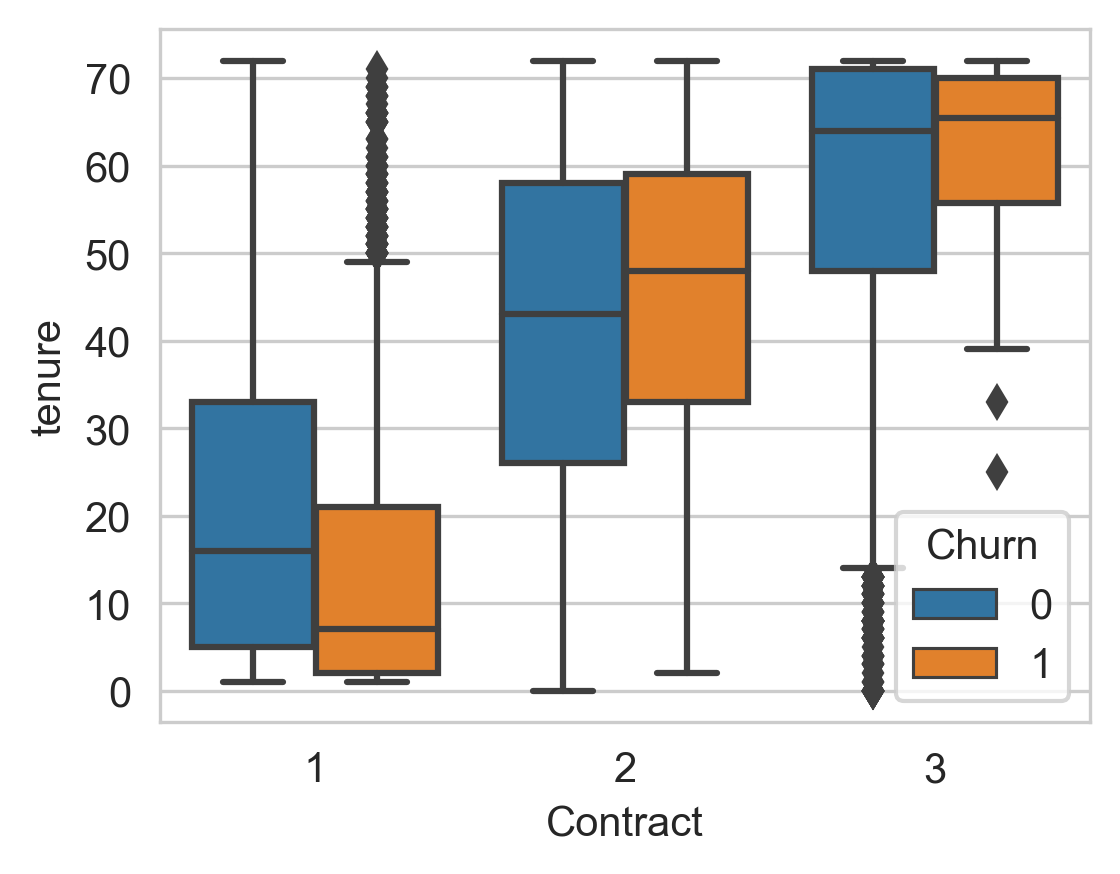

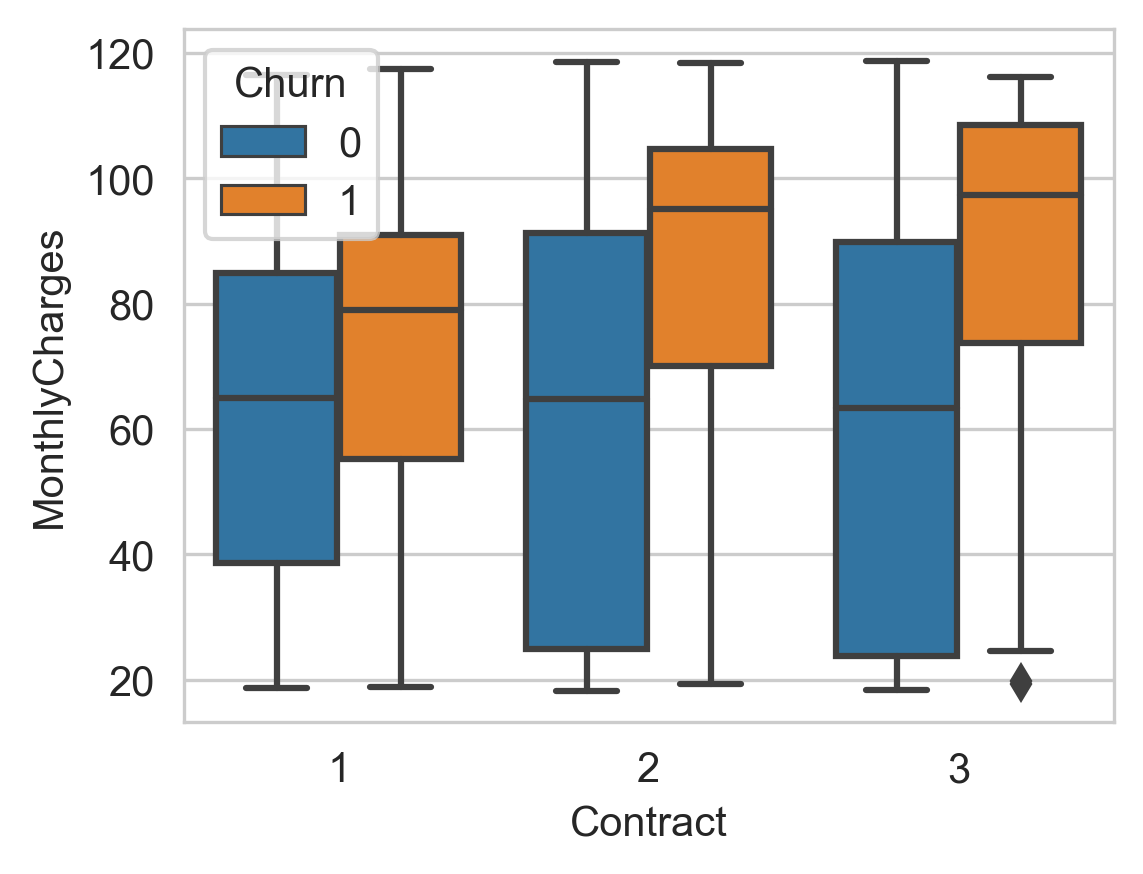

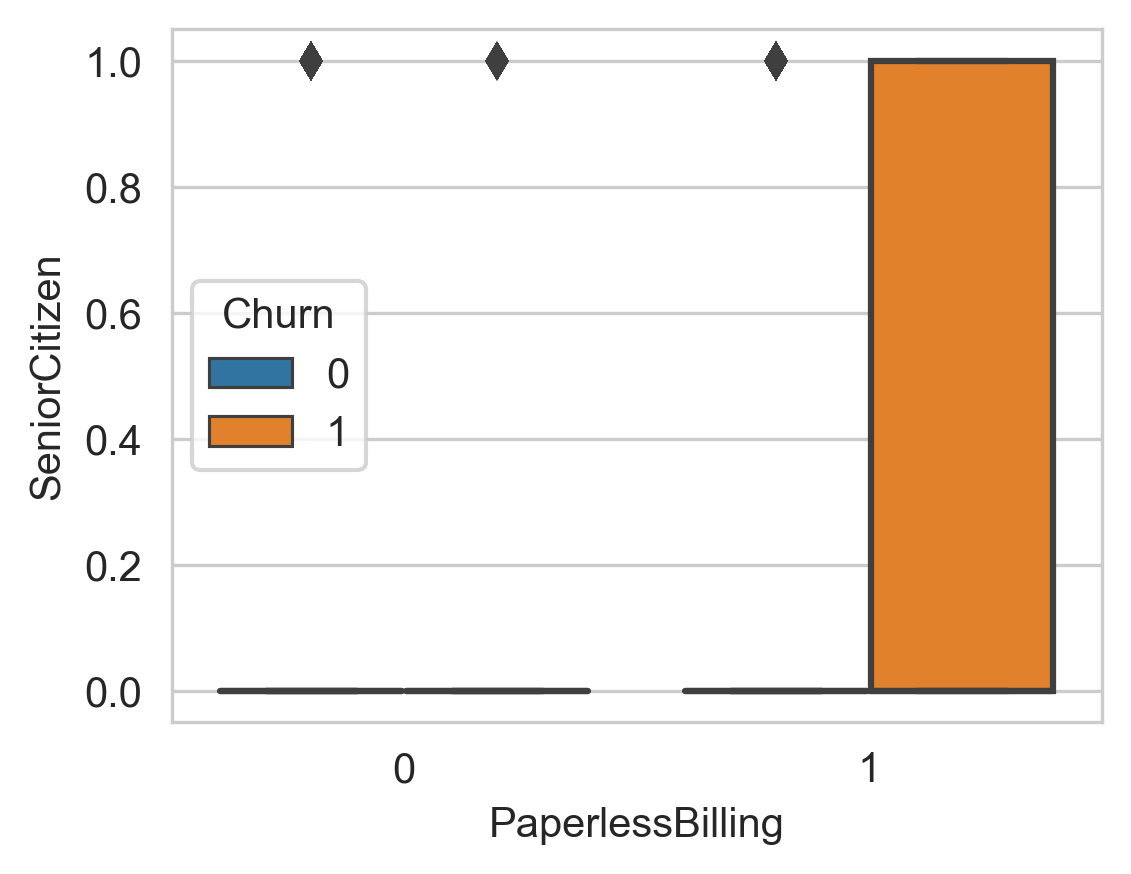

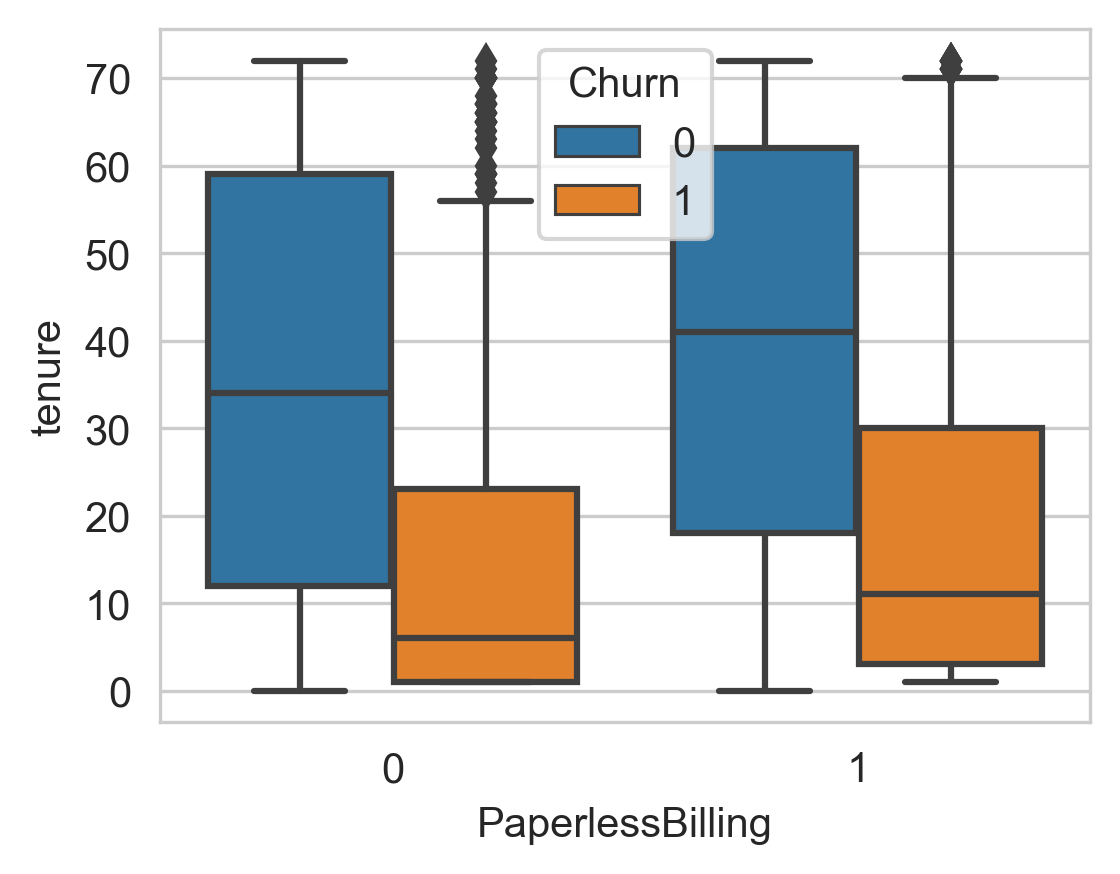

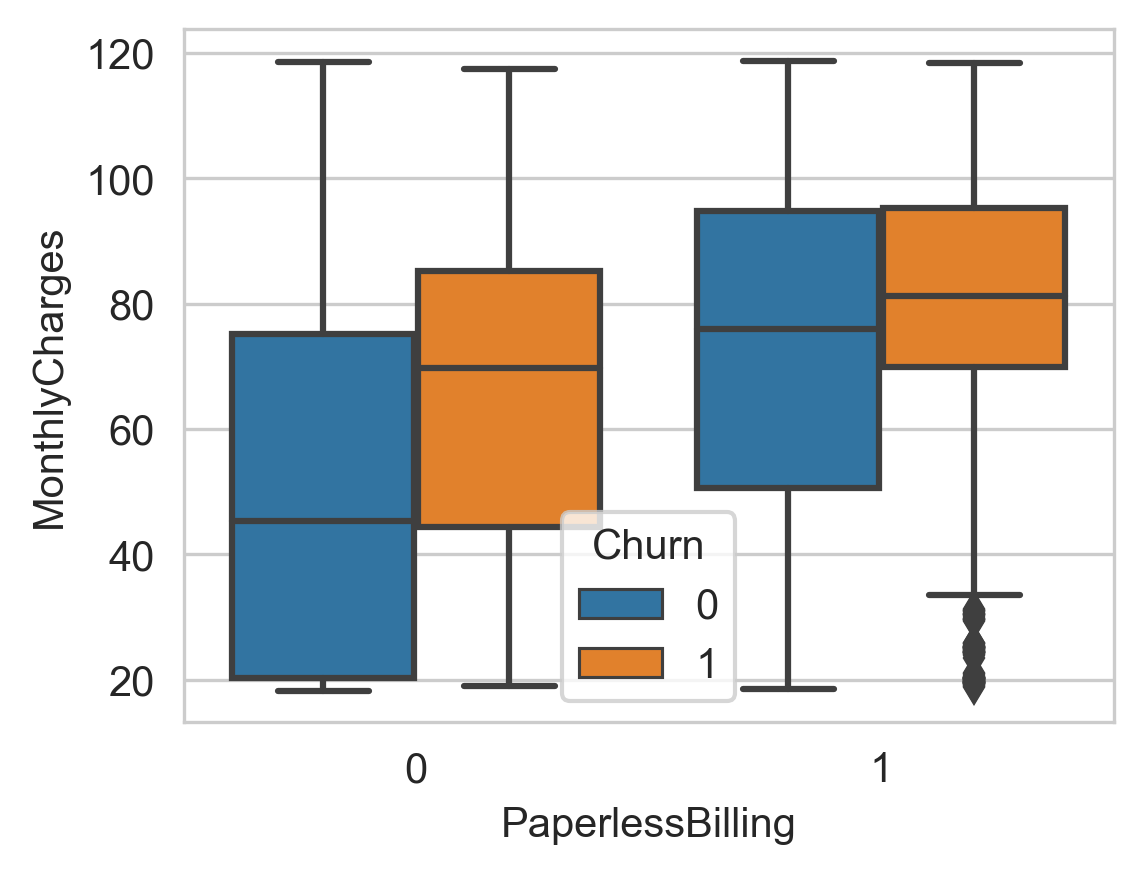

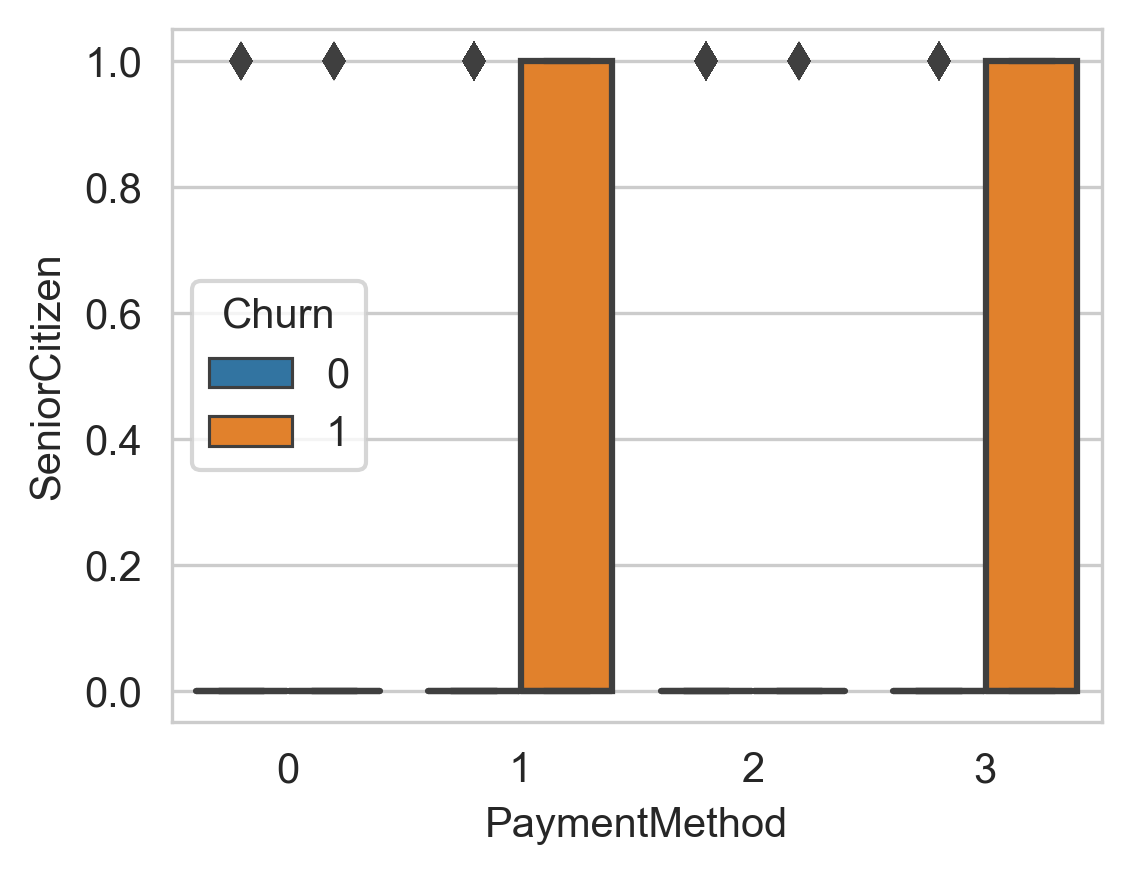

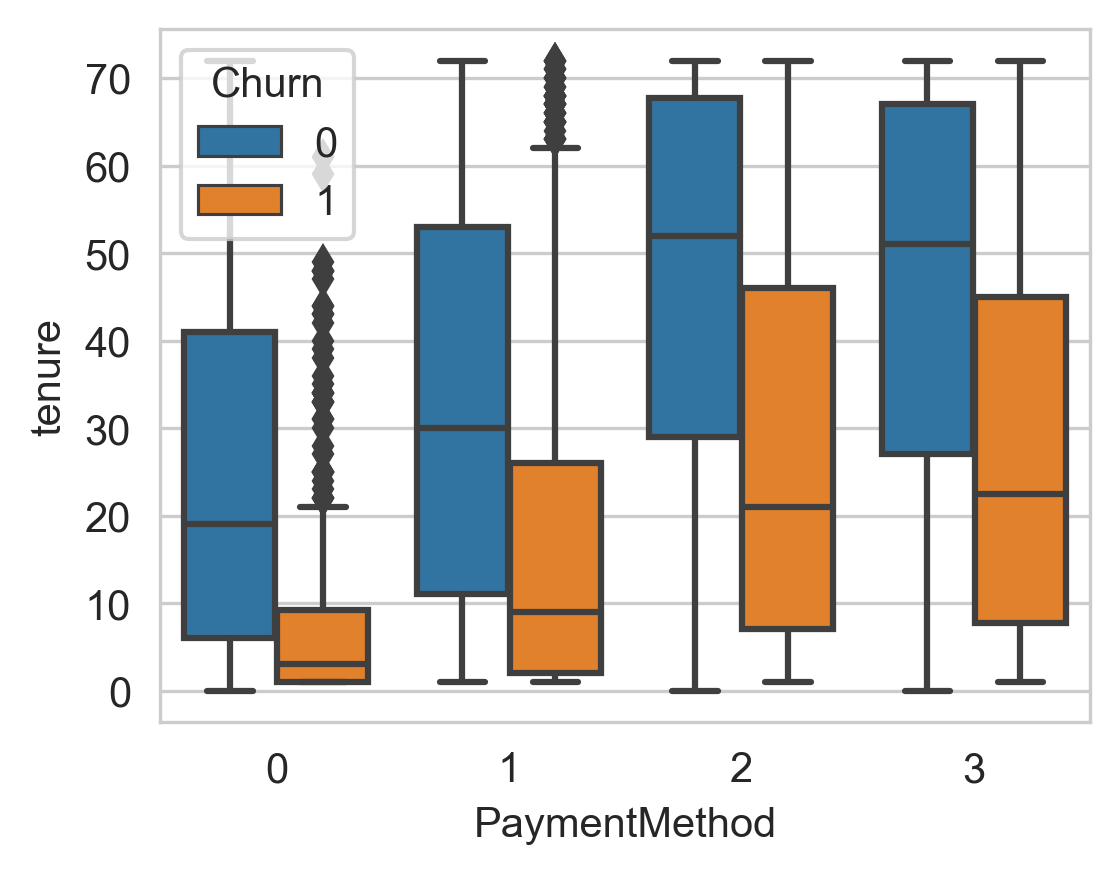

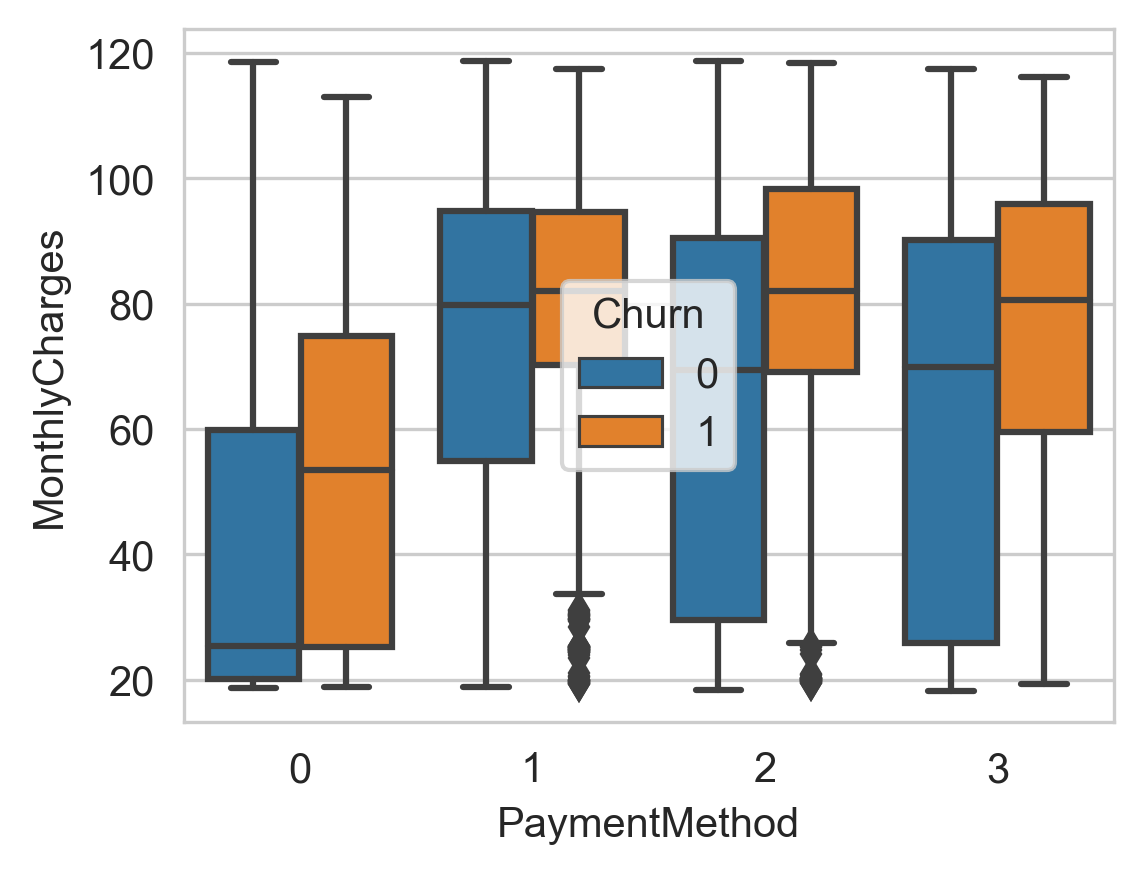

KeyboardInterrupt: 

In [46]:
for i in char[1:] :
  for j in num:

    plt.figure(figsize = (4,3))
    sns.boxplot(x = df[i] , y = df[j] , hue='Churn' , data = df)
    plt.show()